# <center> Predicting Student Drop-off Probability in EdTech sector </center>

## <center> Project Description </center>

### 1. Goals and Objectives

This project aims to analyze patterns within student engagement, course ratings, and other behavioral features to identify students who are likely to drop out or disengage from their online courses. The goal is to provide actionable insights that can help EdTech companies improve student retention and engagement, ultimately enhancing their overall learning experience and increasing their business's success.

In the fast-growing EdTech sector, one of the primary challenges faced by online learning platforms is student retention. With a large volume of courses available, students may begin their journey in an online course but fail to complete it due to various reasons such as lack of engagement, difficulty in course content, poor course experiences, or personal issues. Predicting which students are at risk of leaving a course can help EdTech companies take proactive steps to improve student engagement, adjust course materials, or offer personalized support.

By developing a model that predicts the likelihood of student drop-off, this project addresses the problem of student disengagement and provides a framework for increasing student retention and course completion rates.

### 2. Data Overview

The dataset contains 40,000 records and 22 features, representing demographic, behavioral, and course-related characteristics. Key feature categories include:
- **Demographic**: age, gender, country, state, education level, employment status, industry, years of experience
- **Course Info**: course name, course category, course fee, enrollment date, last active date
- **Engagement & Performance**: engagement score, progress percent, assignment submission rate, attendance rate, satisfaction rating
- **Identifiers**: student id, student name
- **Target Variable**: dropout probability (continuous value indicating likelihood of dropping out)

### 3. Project stages

#### Stage 1: EDA & Feature Engineering & Statistical Assessment

- Handle missing values and outliers
- Create new feature
- Inspect variable distributions and types
- Conduct statistical analysis to understand feature distribution
- Analyze correlation between features and target
- Visualize relationships
- Assess multicillinearity and feature redundancy

#### Stage 2: Transfromation

- Encode categorical variables
- Normalize or transform skewed numerical features

#### Stage 3: Baseline Model and Solution Method Review

- Develop a baseline model using simple regressor
- Compare multiple regression algorithms

#### Stage 4: Model evaluation and Optimization

- Cross-validaton
- Tune Hyperparameters

#### Stage 5: Deployment

## Dataset & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import randint
from scipy.stats import f_oneway
from scipy.stats import multivariate_normal

from IPython.display import display, HTML

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.covariance import EmpiricalCovariance

import shap

import dill

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('archive.zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  40000 non-null  object 
 1   student_name                38792 non-null  object 
 2   age                         19967 non-null  float64
 3   gender                      30030 non-null  object 
 4   country                     40000 non-null  object 
 5   state                       40000 non-null  object 
 6   education_level             31997 non-null  object 
 7   employment_status           31988 non-null  object 
 8   industry                    33132 non-null  object 
 9   years_of_experience         13263 non-null  float64
 10  course_name                 40000 non-null  object 
 11  course_category             40000 non-null  object 
 12  course_fee                  40000 non-null  int64  
 13  engagement_score            380

In [3]:
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'

    return(HTML(s+css))

In [4]:
# Convert text columns to categorical

categorical_columns = ['student_id', 'student_name', 'gender', 'country', 'state', 'education_level',
                      'employment_status', 'industry', 'course_name', 'course_category', 'dropout_status']

for col in categorical_columns:
    data[col] = data[col].astype('category')

## EDA & Feature Engineering & Statistical Assessment

#### Reviewing each feature and filling in missing values

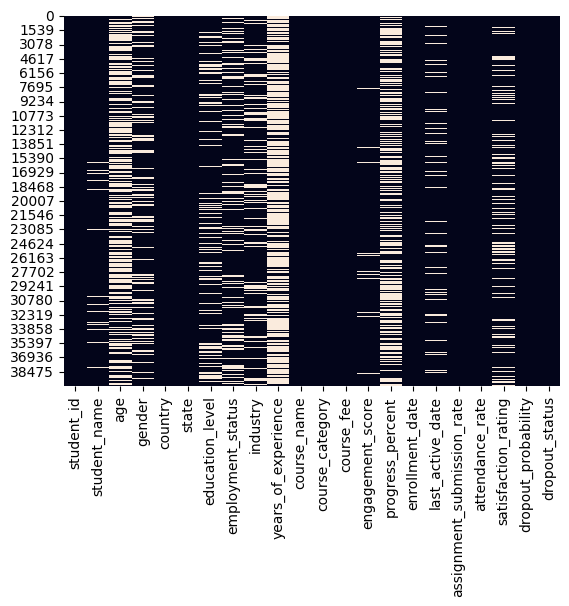

In [5]:
# Visualize missingness

sns.heatmap(data.isnull(), cbar = False);

In [6]:
data.describe()

age  years_of_experience    course_fee  engagement_score  \
count  19967.000000          13263.00000  40000.000000      38043.000000   
mean      31.511494              5.00760   1870.223750          0.501163   
std        8.091772              2.89022    450.492243          0.288570   
min       18.000000              0.00000   1150.000000          0.000000   
25%       25.000000              2.50000   1500.000000          0.250000   
50%       31.000000              5.00000   1750.000000          0.500000   
75%       39.000000              7.50000   2250.000000          0.750000   
max       45.000000             10.00000   2800.000000          1.000000   

       progress_percent  assignment_submission_rate  attendance_rate  \
count      20048.000000                40000.000000     40000.000000   
mean          50.000399                    0.501696         0.699710   
std           29.268873                    0.289043         0.173244   
min            0.000000                    0.000000         0.400000   
25%           24.000000                    0.250000         0.550000   
50%           50.000000                    0.500000         0.700000   
75%           76.000000                    0.750000         0.850000   
max          100.000000                    1.000000         1.000000   

       satisfaction_rating  dropout_probability  
count         33404.000000         40000.000000  
mean              3.013082             0.439591  
std               1.415074             0.138967  
min               1.000000             0.010000  
25%               2.000000             0.340000  
50%               3.000000             0.440000  
75%               4.000000             0.540000  
max               5.000000             0.850000

#### Note:

sklearn.impute is used 

- to avoid dropping rows or columns with missing values, which could result in information loss;
- to ensure compatibility with machine learning algorithms that require complete data.
- to apply consistent and reproducible strategies

In function **def impute_ ()** I selected a subset of features that are:
- relevant for predicting certain feature
- numeric or categorical (structured)
- not identifiers or target leakage

In function **def impute_ ()** in SimpleImputer for numeric features the strategy is chosen as 'median', although there is an option for 'mean'. The reasons for such choice are:
- median is more robust, especially for numeric features like engagement score and progress percent
- engagement score: some students have extreme values between 0 and 1
- attendance rate: is between 40% and 100% for top students
- assignment submission rate: has symmetric distribution

Using 'mean' in these cases might pull the imputed value too high or low, introducing bias into the model. Usage of 'mean':
- if the feature is normally distributed - not all the features in the current data
- if the feature has low variance and no extreme values
- for very dense datasets with few missing entries - which is not the case with the current dataset

In [7]:
skew_value = data['assignment_submission_rate'].skew()
print(f'Skewness of assignment submission rate: {skew_value:.2f}')

Skewness of assignment submission rate: -0.00


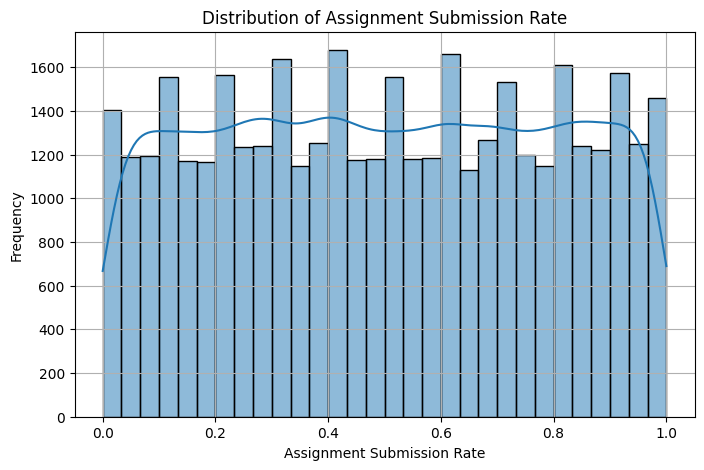

In [8]:
plt.figure(figsize = (8, 5))
sns.histplot(data['assignment_submission_rate'].dropna(), bins = 30, kde = True)
plt.title('Distribution of Assignment Submission Rate')
plt.xlabel('Assignment Submission Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show();

#### Gender feature

In [9]:
data['gender'].isna().sum()

np.int64(9970)

In [10]:
from impute_gender_function import impute_gender

data, gender_pipeline = impute_gender(data, return_pipeline = True)

try:
    with open('imputer_gender_pipeline.pkl', 'wb') as f:
        dill.dump(gender_pipeline, f)
    print('Gender imputer saved.')
except Exception as e:
    print('Error saving gender imputer:', e)

Gender imputer saved.


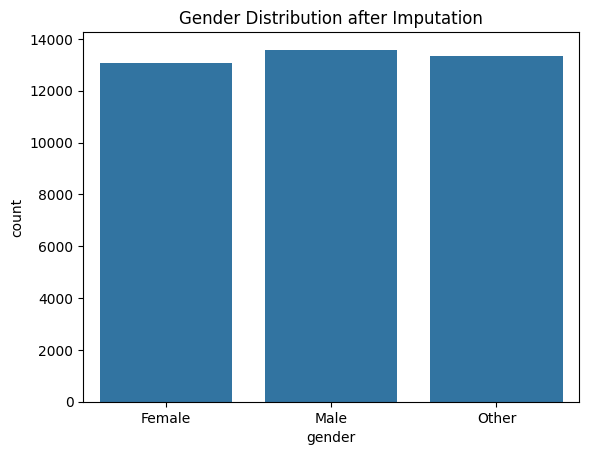

In [11]:
sns.countplot(data = data, x = data['gender'])
plt.title('Gender Distribution after Imputation')
plt.show();

#### Age feature

In [12]:
data['age'].isna().sum()

np.int64(20033)

In [13]:
from impute_age_function import impute_age

data, age_pipeline = impute_age(data, return_pipeline = True)
try:
    with open('imputer_age_pipeline.pkl', 'wb') as f:
        dill.dump(age_pipeline, f)
    print('Age imputer saved.')
except Exception as e:
    print('Error saving age impiter:', e)

Age imputer saved.


In [14]:
data['age'].isna().sum()

np.int64(0)

#### Education Level Feature

In [15]:
data['education_level'].isna().sum()

np.int64(8003)

In [16]:
from impute_education_function import impute_education_level

data, education_pipeline = impute_education_level(data, return_pipeline = True)

try:
    with open('imputer_education_pipeline.pkl', 'wb') as f:
        dill.dump(education_pipeline, f)
    print('Education imputer saved.')
except Exception as e:
    print('Error saving education imputer:', e)

Education imputer saved.


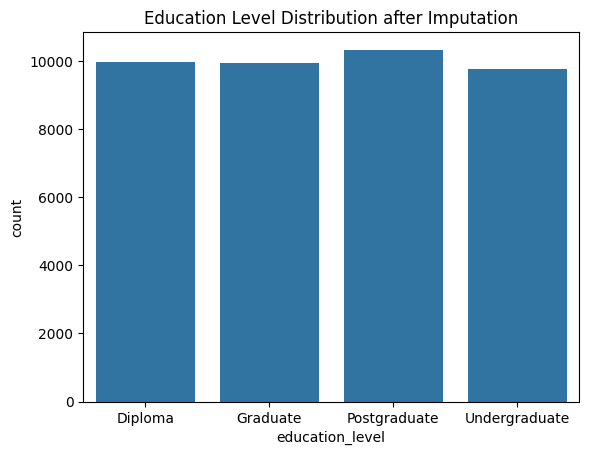

In [17]:
sns.countplot(data = data, x = data['education_level'])
plt.title('Education Level Distribution after Imputation')
plt.show();

#### Employment Status Feature

In [18]:
data['employment_status'].isna().sum()

np.int64(8012)

In [19]:
from impute_employment_function import impute_employment_status

data, employment_pipeline = impute_employment_status(data, return_pipeline = True)

try:
    with open('imputer_employment_pipeline.pkl', 'wb') as f:
        dill.dump(employment_pipeline, f)
    print('Employment imputer saved.')
except Exception as e:
    print('Error saving employment imputer:', e)

Employment imputer saved.


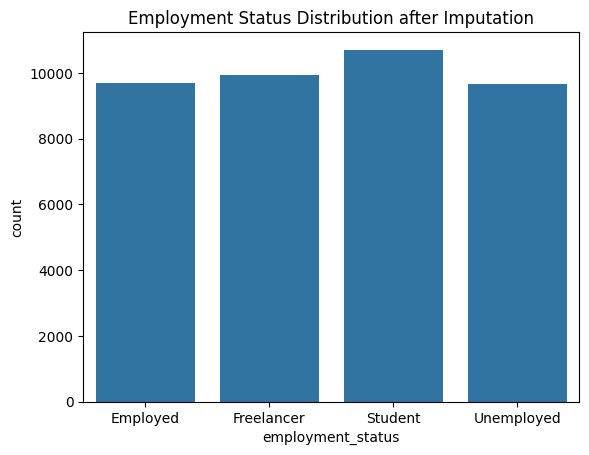

In [20]:
sns.countplot(data = data, x = data['employment_status'])
plt.title('Employment Status Distribution after Imputation')
plt.show();

#### Industry Feature

In [21]:
data['industry'].isna().sum()

np.int64(6868)

In [22]:
from impute_industry_function import impute_industry

data, industry_pipeline = impute_industry(data, return_pipeline = True)

try:
    with open('imputer_industry_pipeline. pkl', 'wb') as f:
        dill.dump(industry_pipeline, f)
    print('Industry imputer saved.')
except Exception as e:
    print('Error saving industry imputer:', e)

Industry imputer saved.


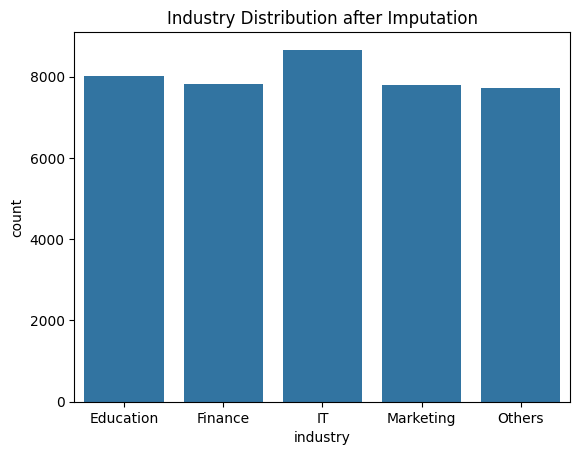

In [23]:
sns.countplot(data = data, x = data['industry'])
plt.title('Industry Distribution after Imputation')
plt.show();

#### Years of Experience Feature

In [24]:
data['years_of_experience'].isna().sum()

np.int64(26737)

#### Note:

Feature years of experience is heavily missing continuous feature - 67% missing values. First, the correlation between target value 'dropout_probability' and 'years_of_experience' to be checked. Second step - comparison distribution of years of experience across employment status 

In [25]:
# Correlation with dropout

data[['years_of_experience', 'dropout_probability']].corr()

years_of_experience  dropout_probability
years_of_experience             1.000000            -0.007195
dropout_probability            -0.007195             1.000000

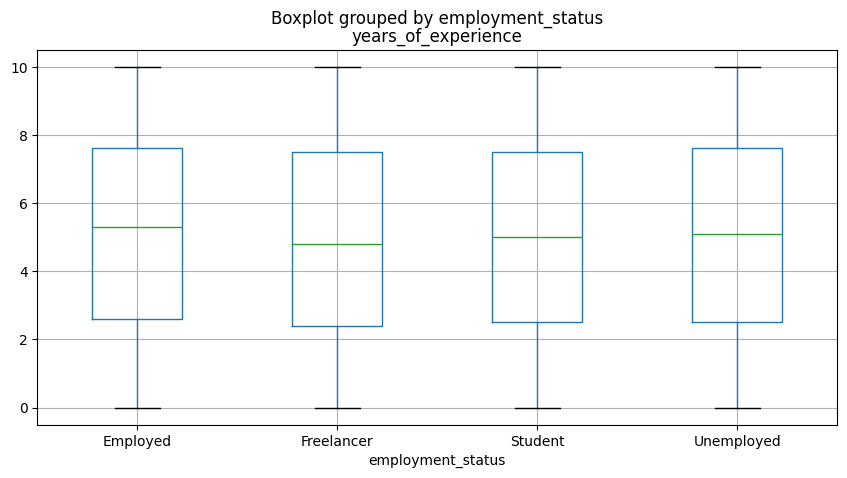

In [26]:
# Compare distribution across employment status

data.boxplot(column = 'years_of_experience', by = 'employment_status',
            figsize = (10, 5));

#### Conclusion

Correlation = -0.007 is extremely weak - essentially no linear correlation with the target. So years of experience is not a strong predictor of dropout probability. The distributions of years of experience across employment status (Employed, Freelancer, Student, Unemployed) are:
- fairly similar in shape and range
- show some central tendency variation
- but overall variance is quite large

Hence, group-wise median imputation to be used, because:
- correlation is too weak to justify building a regresion model (similar as for 'age' feature)
- group-wise imputation (by 'employment_status') still respects data structure
- much faster and simpler - ideal for large missingness (67%)

In [27]:
# Create missing flag helps model learn missingness itself may carry meaning

data['years_of_experience_missing'] = data['years_of_experience'].isna().astype(int)

# Group-wise median imputation

data['years_of_experience'] = data.groupby('employment_status')['years_of_experience'].transform(
    lambda x: x.fillna(x.median())
)

#### Engagement Score Feature

In [28]:
data['engagement_score'].isna().sum()

np.int64(1957)

Since missingness is low (5%)  and feature is important the following approach is worth to apply

In [29]:
imputer = SimpleImputer(strategy = 'median')
data['engagement_score'] = imputer.fit_transform(data[['engagement_score']])

#### Progress Percent Feature

In [30]:
data['progress_percent'].isna().sum()

np.int64(19952)

In [31]:
from impute_progress_function import impute_progress_percent

data, progress_pipeline = impute_progress_percent(data, return_pipeline = True)

try:
    with open('imputer_progress_pipeline.pkl', 'wb') as f:
        dill.dump(progress_pipeline, f)
    print('Progress imputer saved.')
except Exception as e:
    print('Error saving progress imputer:', e)

Progress imputer saved.


In [32]:
data['progress_percent'].isna().sum()

np.int64(0)

#### Enrollment date & Last Active Date

In [33]:
# Convert features into datetime

data['enrollment_date'] = pd.to_datetime(data['enrollment_date'], errors = 'coerce').dt.normalize()
data['last_active_date'] = pd.to_datetime(data['last_active_date'], errors = 'coerce').dt.normalize()

In [34]:
data['last_active_date'].isna().sum()

np.int64(4029)

#### Note:

There are 4029 missing values in the column last_active_date, which is 10%. 
In real world EdTech platforms, when a student never engages after enrollment, their last activity is their enrollment. This maintains chronological integrity and avoids creating fictional activity.

In [35]:
data['last_active_date'] = data['last_active_date'].fillna(data['enrollment_date'])

In [36]:
# new features

data['active_days'] = data['last_active_date'] - data['enrollment_date']
data['enrollment_month'] = pd.to_datetime(data['enrollment_date'], errors = 'coerce').dt.month
data['enrollment_year'] = pd.to_datetime(data['enrollment_date'], errors = 'coerce').dt.year

#### Satisfaction Rating Feature

In [37]:
data['satisfaction_rating'].isna().sum()

np.int64(6596)

#### Note:

16% of missing values is significant. Therefore, for better accuracy it is worth to use model-based imputation.

In [38]:
from impute_satisfaction_function import impute_satisfaction_rating

data, satisfaction_pipeline = impute_satisfaction_rating(data, return_pipeline = True)

try:
    with open('imputer_satisfaction_pipeline.pkl', 'wb') as f:
        dill.dump(satisfaction_pipeline, f)
    print('Satisfaction imputer saved.')
except Exception as e:
    print('Error saving satisfaction imputer:', e)

Satisfaction imputer saved.


In [39]:
data['satisfaction_rating'].isna().sum()

np.int64(0)

#### Visualization of numeric features and linear relation with target feature

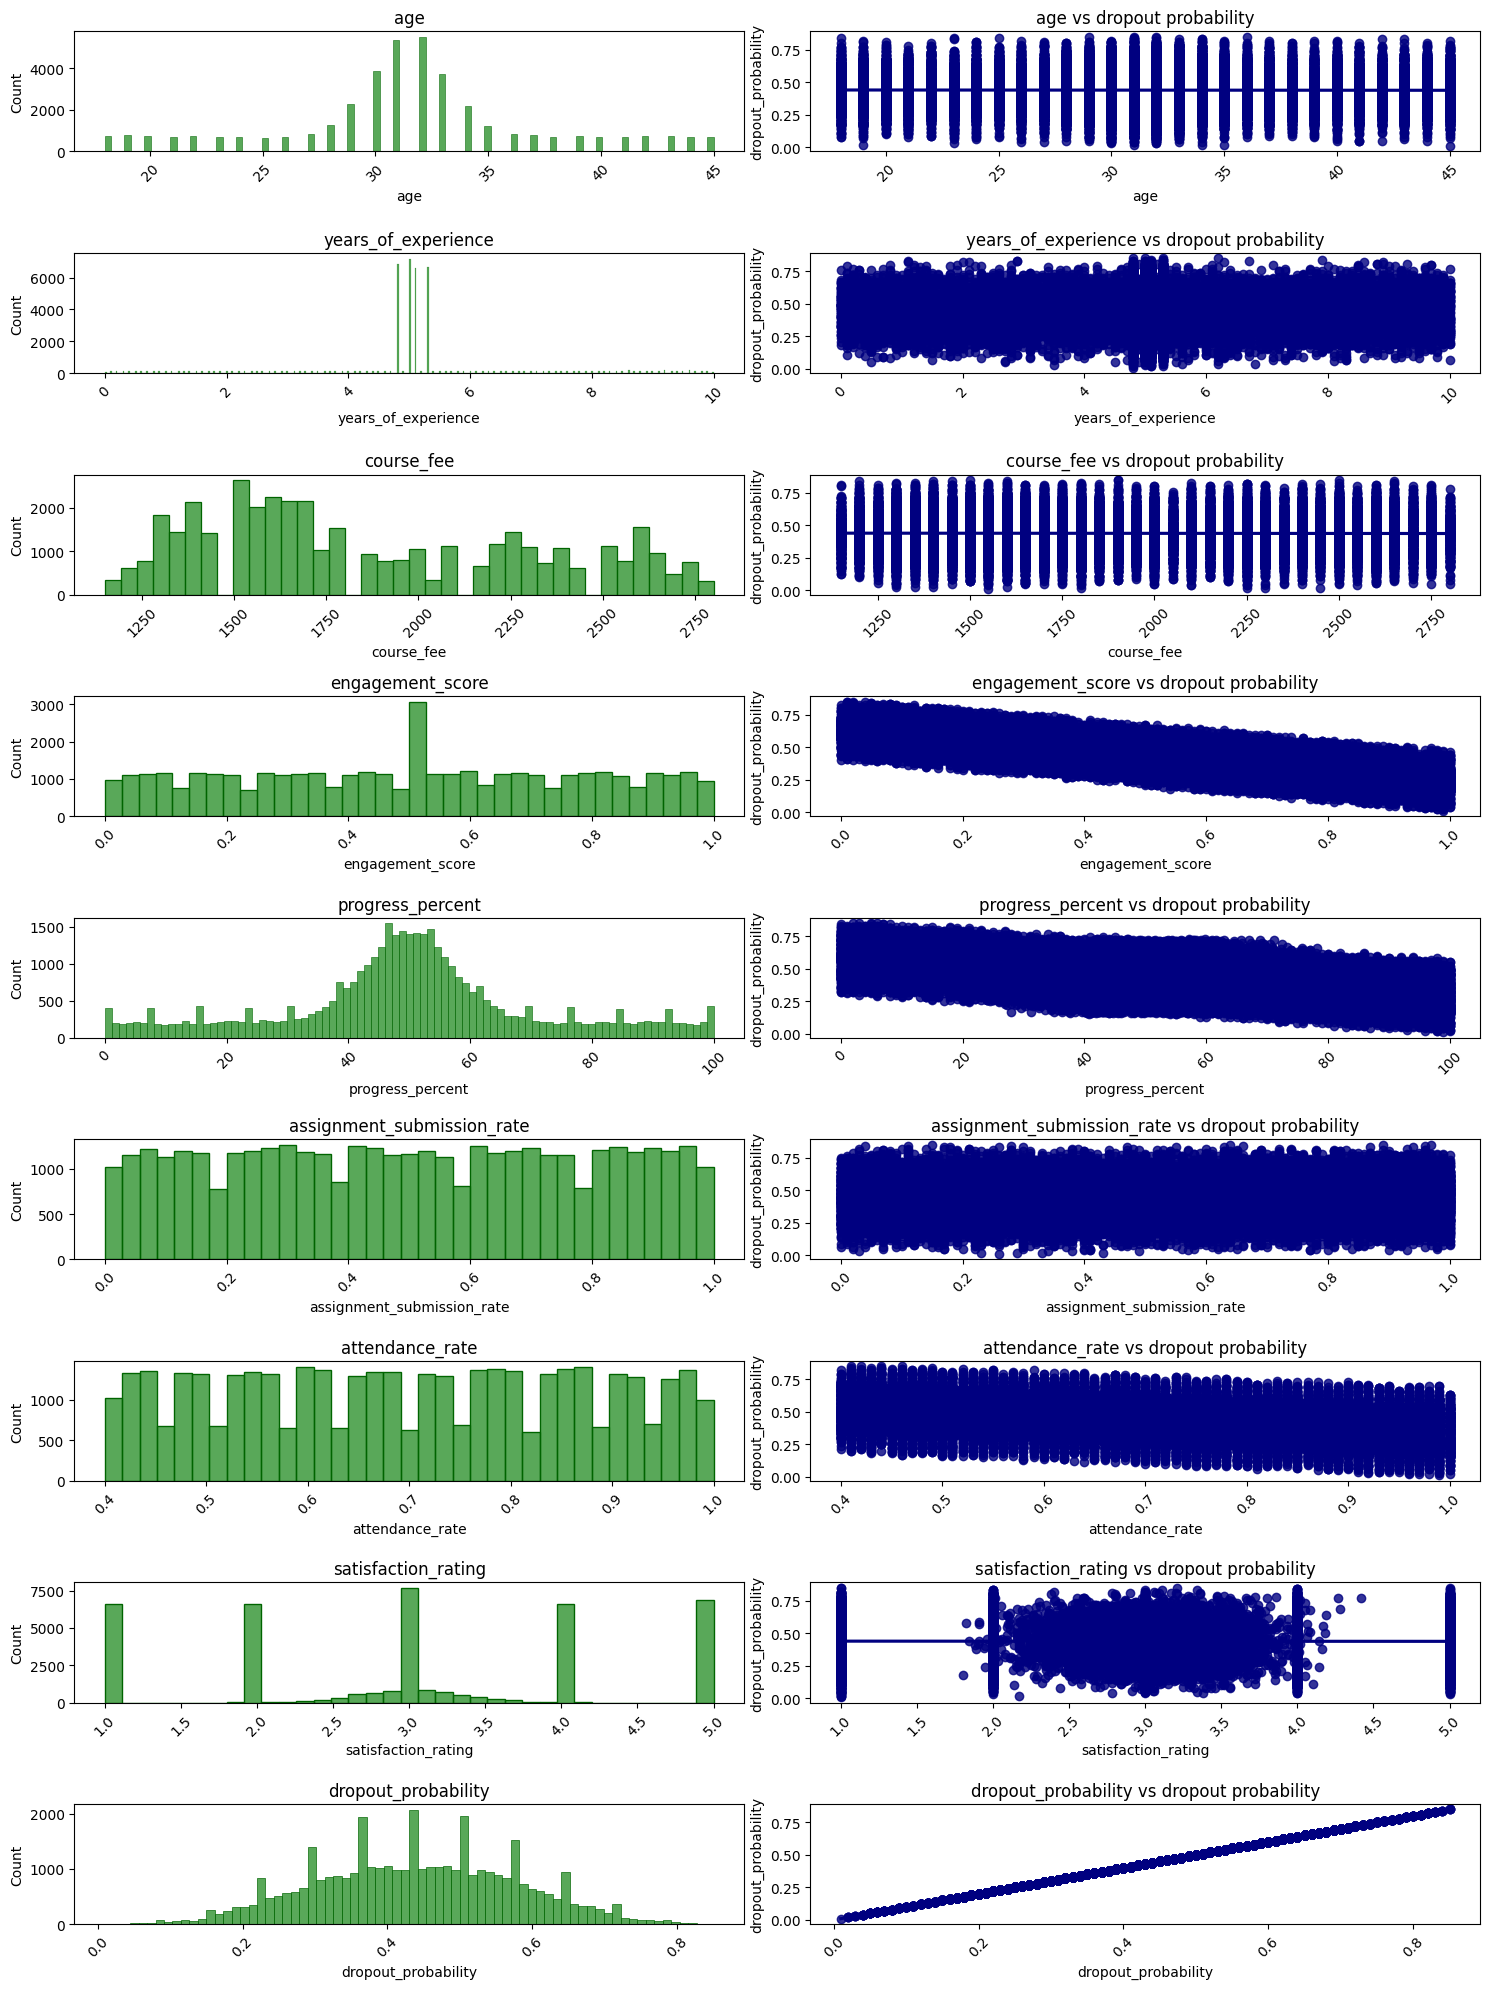

In [40]:
numerical_features = ['age', 'years_of_experience', 'course_fee', 'engagement_score',
                     'progress_percent', 'assignment_submission_rate', 'attendance_rate',
                     'satisfaction_rating', 'dropout_probability']

n = len(numerical_features)

fig, axes = plt.subplots(n, 2, figsize = (15, 20))

for i, feature in enumerate(numerical_features):

    histplot = sns.histplot(data = data, x = feature, color = 'forestgreen', edgecolor = 'darkgreen', ax = axes[i][0])
    histplot.set_title('{}'.format(feature))
    histplot.xaxis.set_tick_params(rotation = 45)

    regplot = sns.regplot(data = data, x = feature, y = 'dropout_probability', color = 'navy', ax = axes[i][1])
    regplot.set_title('{} vs dropout probability'.format(feature))
    regplot.xaxis.set_tick_params(rotation = 45);

plt.tight_layout()

### Conclusion

1. Age:
   - Distribution: Bell-shaped (likely close to normal)
   - Relation to Dropout: No clear linear pattern; appears flat
   - Conclusion: Weak or no predictive power on its own

2. Years of Experience
    - Distribution: Highly skewed and sparse
    - Relation to Dropout: Looks like random scatter; no visible pattern
    - Conclusion: Poor correlation, high missingness → may not add much predictive value
      
3. Course Fee
    - Distribution: Multi-modal (e.g., pricing tiers)
    - Relation to Dropout: Slight increasing trend at lower fee ranges
    - Conclusion: Small inverse relationship (lower fee → higher dropout?), possibly meaningful
  
4. Engagement Score
    - Distribution: Slight central peak
    - Relation to Dropout: Strong negative correlation — as engagement increases, dropout probability decreases
    - Conclusion: Very predictive of dropout — important feature
  
5. Progress Percent
    - Distribution: Symmetric but some peaks — many users stuck around 0%
    - Relation to Dropout: Strong negative linear trend
    - Conclusion: Highly predictive — great feature to retain
  
6. Assignment Submission Rate
    - Distribution: Uniform-like
    - Relation to Dropout: Slight negative slope
    - Conclusion: Some predictive value — worth keeping
  
7. Attendance Rate
    - Distribution: Fairly uniform
    - Relation to Dropout: Slight downward trend
    - Conclusion: Might help — retain and check multicollinearity with engagement/progress

8. Satisfaction Rating
    - Distribution: Left-skewed; some strong peaks
    - Relation to Dropout: Not linear; possibly U-shaped or tiered
    - Conclusion: Not strongly linear, but still worth encoding — may be nonlinearly predictive

### Creating new features

##### Note:

Even though regression models work with continuous variables, binning can still be useful in specific cases, especially for feature engineering.

1. **Nonlinear Relationships**
If a numerical feature doesn't have a linear relationship with the target for example, satisfaction vs. dropout shows nonlinear pattern, then:
- Binning can simplify the pattern into discrete steps
- Especially useful for tree-based models (e.g., Random Forest, XGBoost), which handle categories well

2. **Capturing Threshold Effects**
Sometimes real-world decisions operate in tiers:
- For example, students paying below 1500 USD might behave differently than those paying above 2500 USD
- Satisfaction ≤ 2 might be "dissatisfied", ≥ 4 might be "happy", which can affect dropout differently

3. **Reducing Noise**

Binning can smooth noisy data, especially when there are outliers or irregular distributions and the feature has lots of values but limited unique impact

#### 1. Binning Satisfaction Rating into categories

In [41]:
def bucket_satisfaction(x):
    if x <= 2:
        return 'low'
    elif x <= 4:
        return 'medium'
    else:
        return 'high'

data['satisfaction_bucket'] = data['satisfaction_rating'].apply(bucket_satisfaction)

In [42]:
data['satisfaction_bucket'].value_counts()

satisfaction_bucket
medium    19931
low       13203
high       6866
Name: count, dtype: int64

#### 2. Binning Course Fee into ranges:

In [43]:
print(f"Min fee: {data['course_fee'].min()}, Max fee: {data['course_fee'].max()}")

Min fee: 1150, Max fee: 2800


In [44]:
data['course_fee_bin'] = pd.cut(data['course_fee'],
                               bins = [1100, 1500, 2000, 2500, 3000],
                               labels = ['low', 'medium', 'high', 'premium'],
                               include_lowest = True)

data['course_fee_bin'].value_counts()

course_fee_bin
medium     14667
low        11179
high        9336
premium     4818
Name: count, dtype: int64

#### 3. Create Participation Level Feature

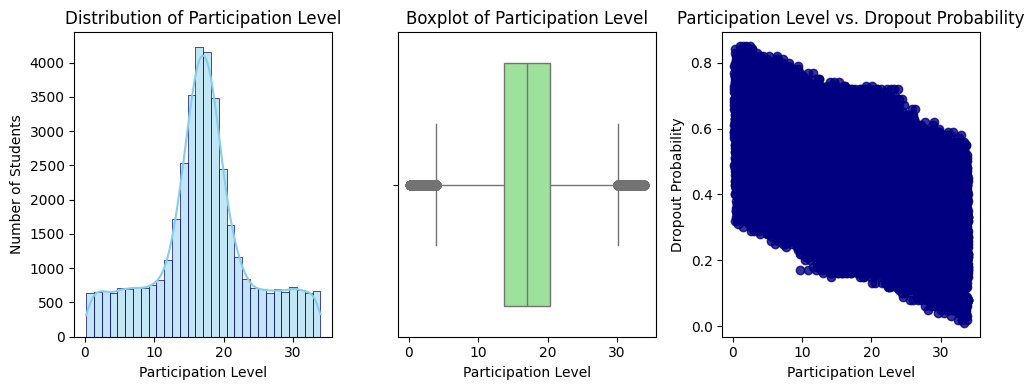

In [45]:
participation_features = ['progress_percent', 'attendance_rate', 'assignment_submission_rate']
data['participation_level'] = data[participation_features].mean(axis = 1)

# Visualization

plt.figure(figsize = (10, 4))

plt.subplot(1, 3, 1)
sns.histplot(data['participation_level'], bins = 30, kde=True, color = 'skyblue', edgecolor = 'darkblue')
plt.title('Distribution of Participation Level')
plt.xlabel('Participation Level')
plt.ylabel('Number of Students')

plt.subplot(1, 3, 2)
sns.boxplot(x = data['participation_level'], color = 'lightgreen')
plt.title('Boxplot of Participation Level')
plt.xlabel('Participation Level')

plt.subplot(1, 3, 3)
sns.regplot(data = data, x = 'participation_level', y = 'dropout_probability', color = 'navy')
plt.title('Participation Level vs. Dropout Probability')
plt.xlabel('Participation Level')
plt.ylabel('Dropout Probability')

plt.tight_layout()
plt.show();

#### Conclusion

Participation level feature is well-scaled and meaningful — it captures behavioral spread without heavy skew. It can be used as-is in modeling without needing transformation. Some students are significantly disengaged (potential early dropouts), and some are hyper-engaged. This feature is highly predictive of the target - dropout_probability.

#### 4. Create Interaction Feature

##### Note:

An interaction term captures the idea that the effect of one variable dpends on another.
> For example, a student with **high participation** but **low satisfaction** may behave differently than one with **high values for both**.

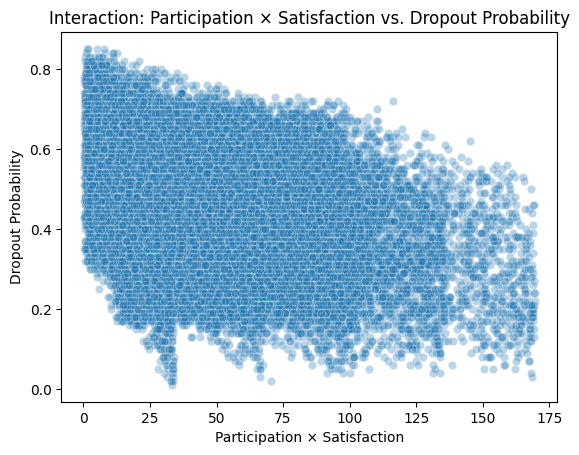

In [46]:
data['participation_satisfaction'] = data['participation_level'] * data['satisfaction_rating']

# Visualization

sns.scatterplot(data = data, x = 'participation_satisfaction', y='dropout_probability', alpha = 0.3)
plt.title('Interaction: Participation × Satisfaction vs. Dropout Probability')
plt.xlabel('Participation × Satisfaction')
plt.ylabel('Dropout Probability')
plt.show();

#### Conclusion

- The scatterplot shows a clear negative relationship:
    - As the product of participation and satisfaction increases, the dropout probability tends to decrease.
- Dense cluster on the left side (lower interaction values) with higher dropout rates.
- Sparser distribution on the right side (higher interaction values), mostly with lower dropout rates.
- A vertical line around 25 suggests many students are stuck at similar low interaction values (likely low participation and/or satisfaction).

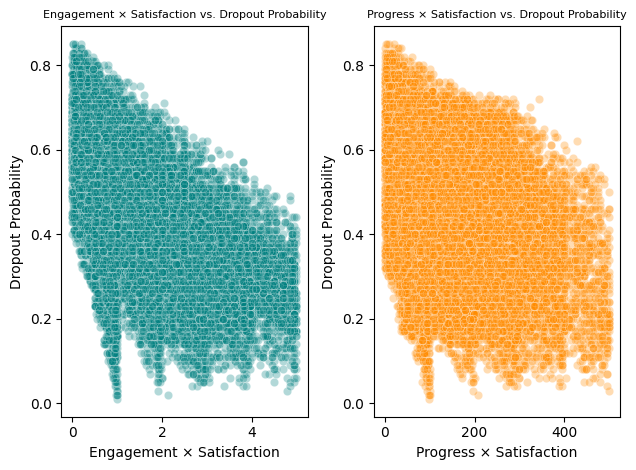

In [47]:
data['engagement_satisfaction'] = data['engagement_score'] * data['satisfaction_rating']

data['progress_satisfaction'] = data['progress_percent'] * data['satisfaction_rating']

# Visualization

plt.subplot(1, 2, 1)
sns.scatterplot(data = data, x = 'engagement_satisfaction', y = 'dropout_probability', alpha=0.3, color='teal')
plt.title('Engagement × Satisfaction vs. Dropout Probability', fontsize = 8)
plt.xlabel('Engagement × Satisfaction')
plt.ylabel('Dropout Probability')

plt.subplot(1, 2, 2)
sns.scatterplot(data = data, x = 'progress_satisfaction', y = 'dropout_probability', alpha=0.3, color='darkorange')
plt.title('Progress × Satisfaction vs. Dropout Probability', fontsize = 8)
plt.xlabel('Progress × Satisfaction')
plt.ylabel('Dropout Probability')

plt.tight_layout()
plt.show();

#### Conclusion:

Both plots show a clear negative relationship between the interaction terms and dropout probability:

- **Engagement × Satisfaction**:
    - As both engagement and satisfaction increase together, dropout probability decreases significantly.
    - Strong early separation of at-risk vs. retained students is visible even at low interaction values.

- **Progress × Satisfaction**:
    - A similarly strong negative trend — students who make more progress and are more satisfied are much less likely to drop out.
    - The spread of values is wider, suggesting this feature may capture more diverse student behavior.

### Grouped Statistics for Categorical Features

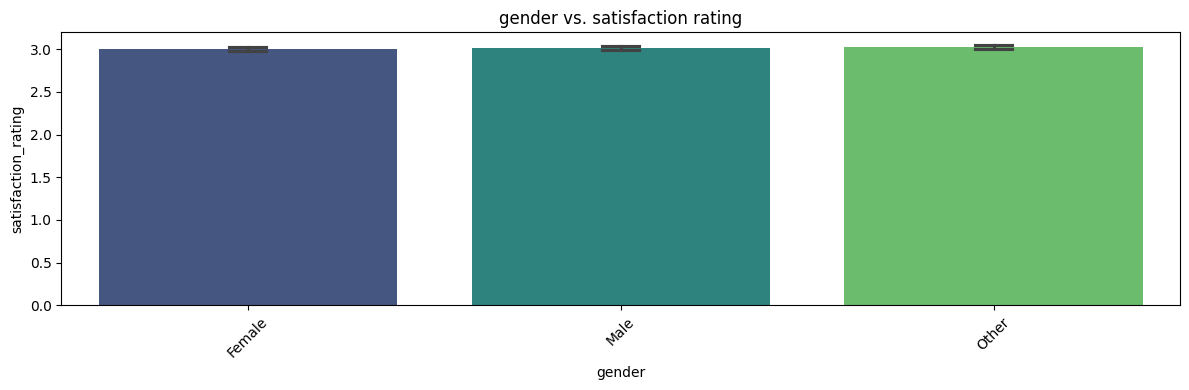

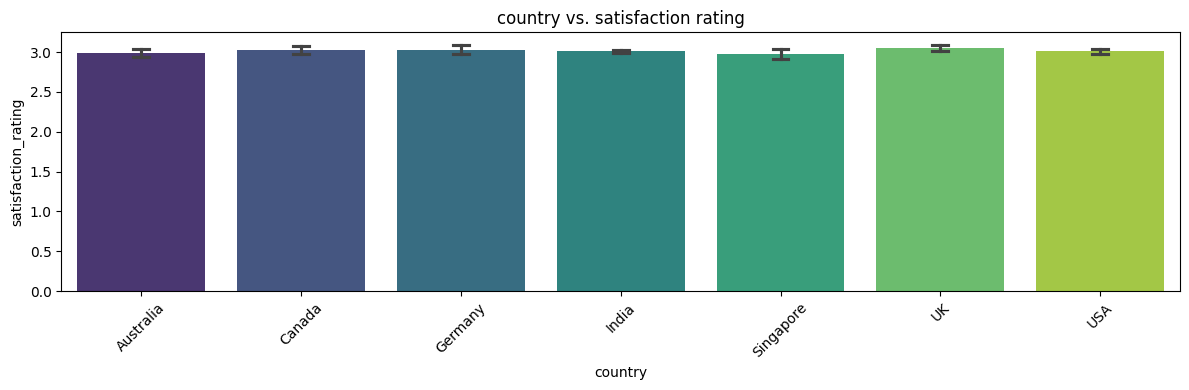

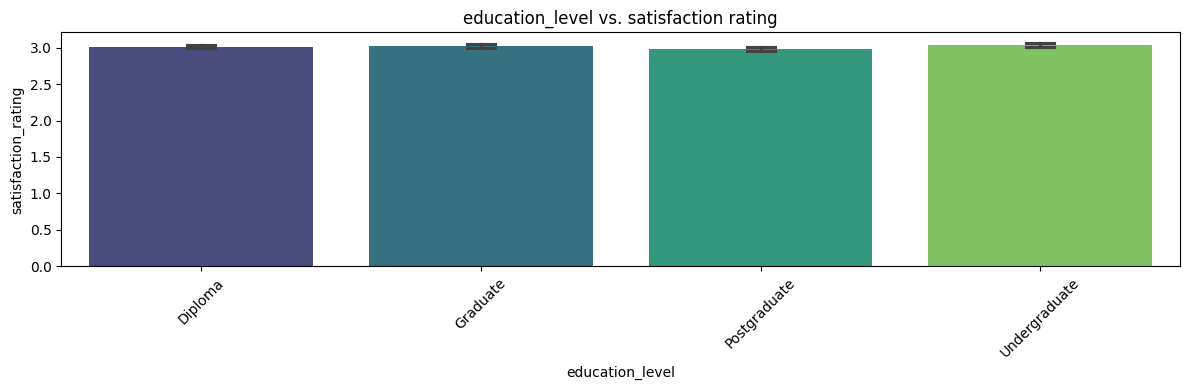

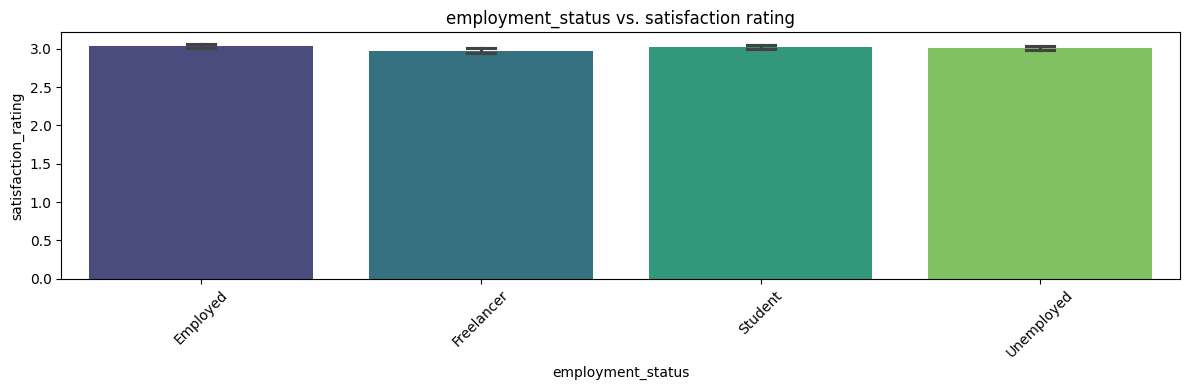

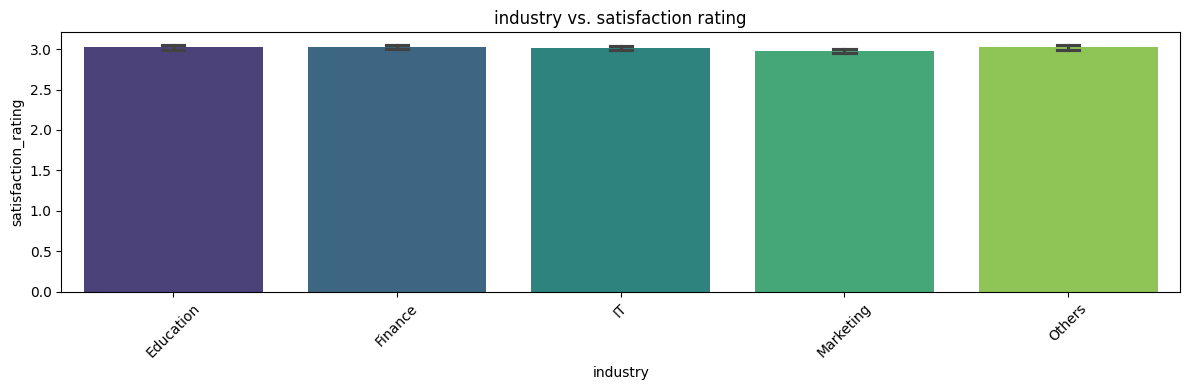

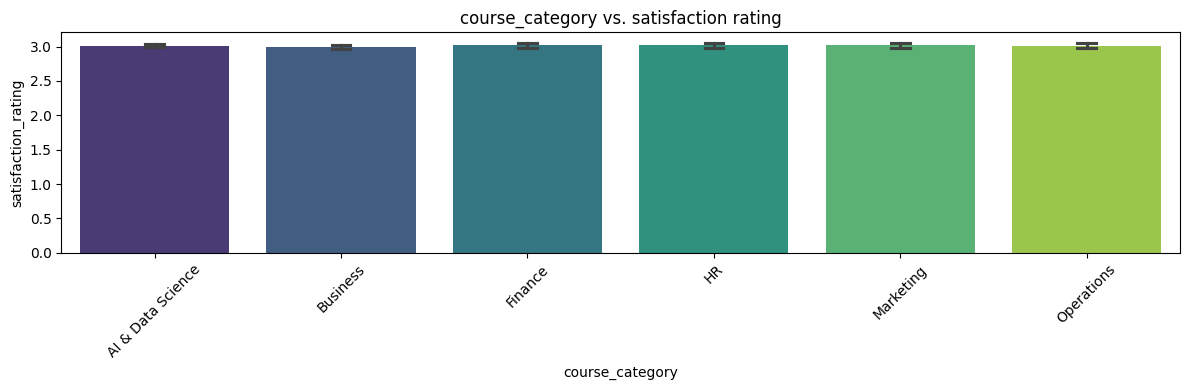

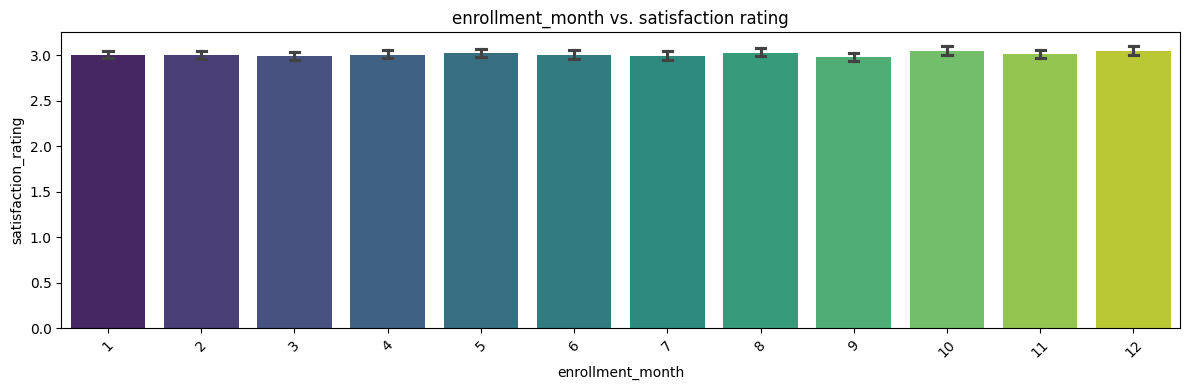

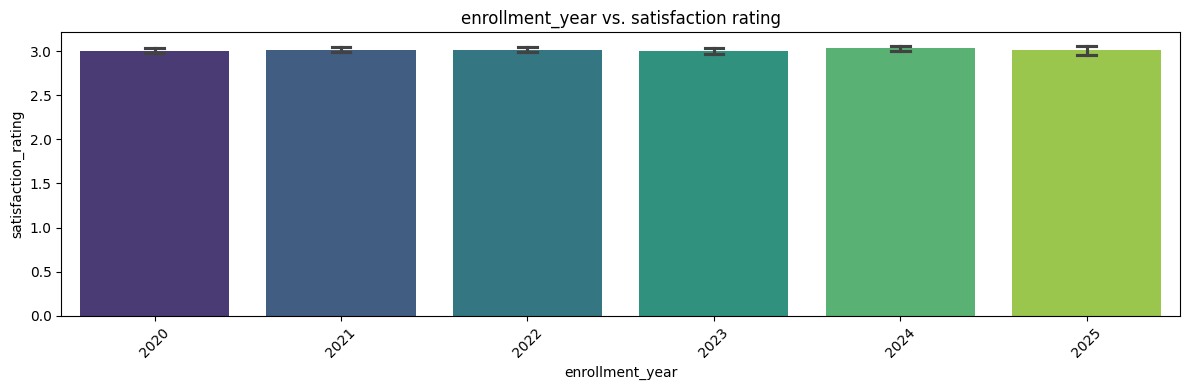

In [48]:
categorical = ['gender', 'country', 'education_level', 'employment_status', 'industry',
              'course_category', 'enrollment_month', 'enrollment_year']


for col in categorical:
    plt.figure(figsize = (12, 4))
    sns.barplot(data = data, x = col, y = 'satisfaction_rating', ci = 95, capsize = 0.1, palette = 'viridis')
    plt.title(f'{col} vs. satisfaction rating')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show();

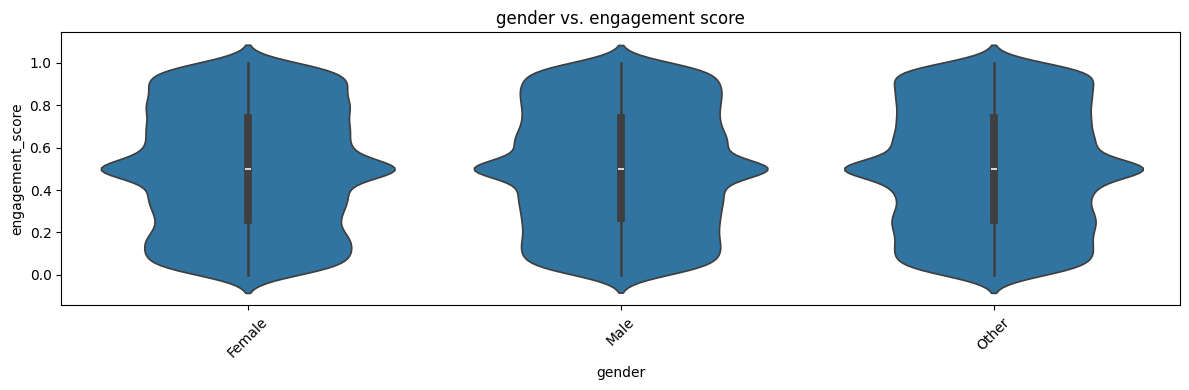

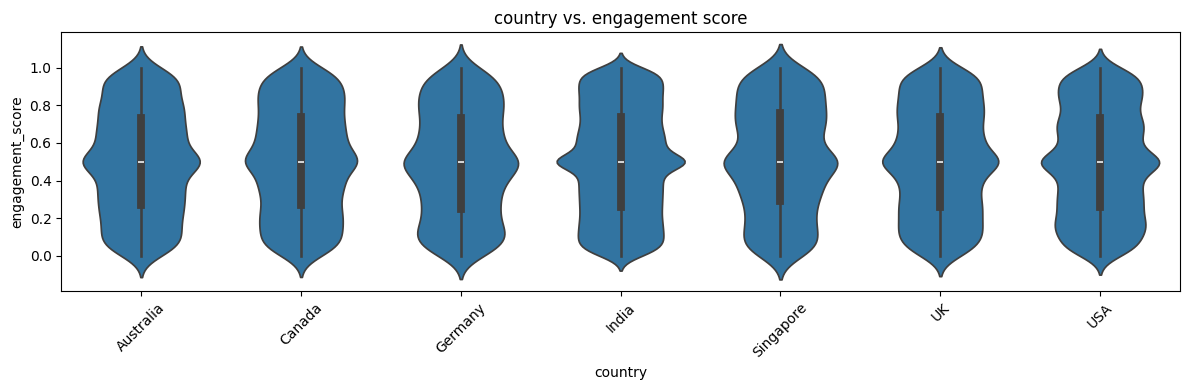

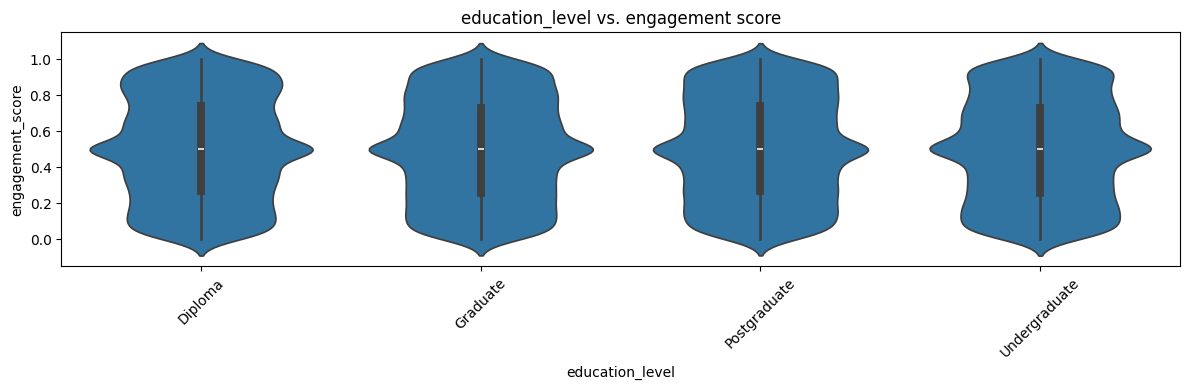

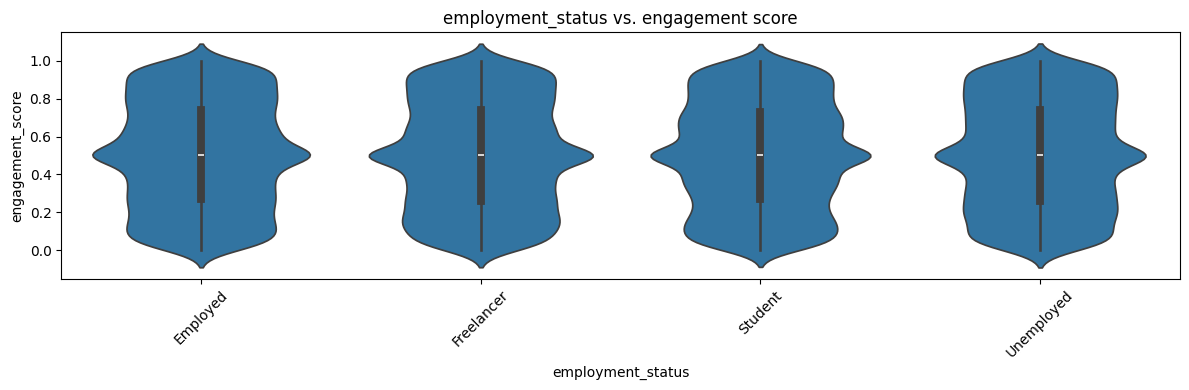

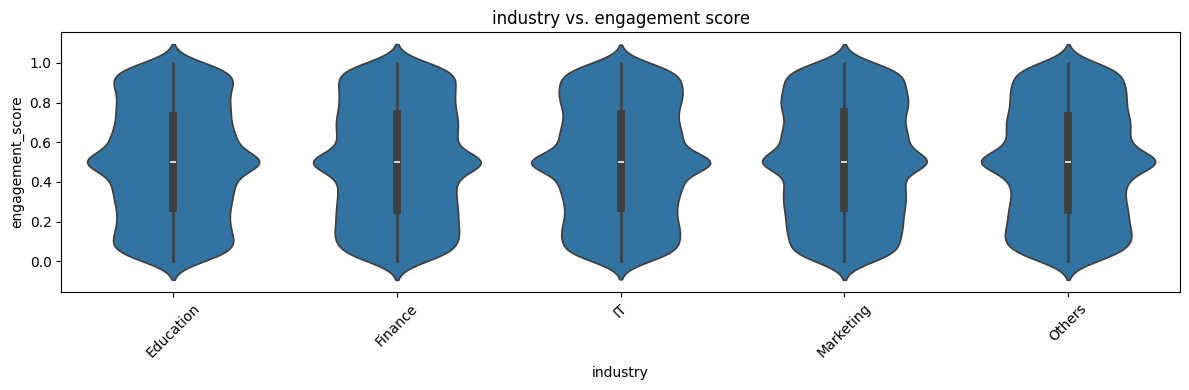

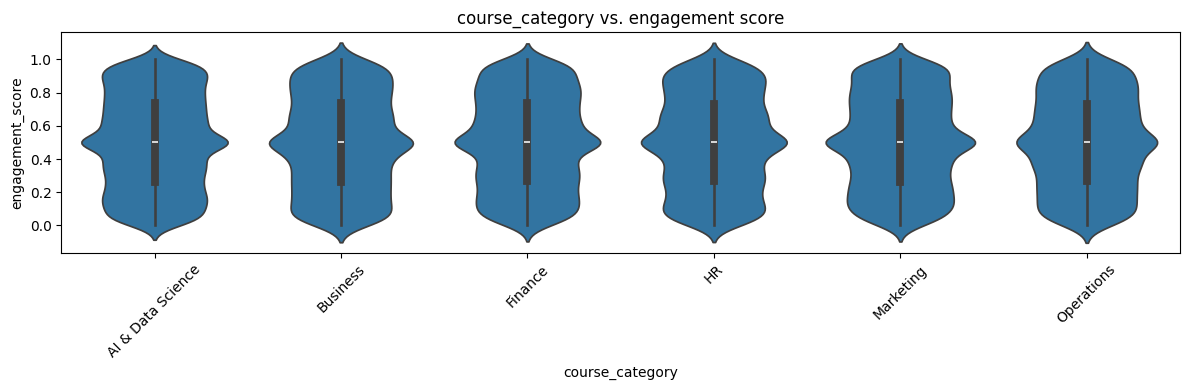

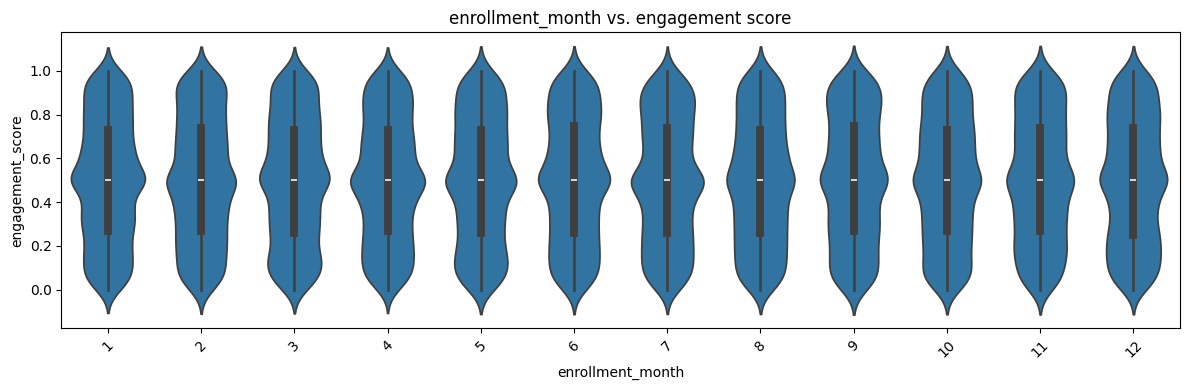

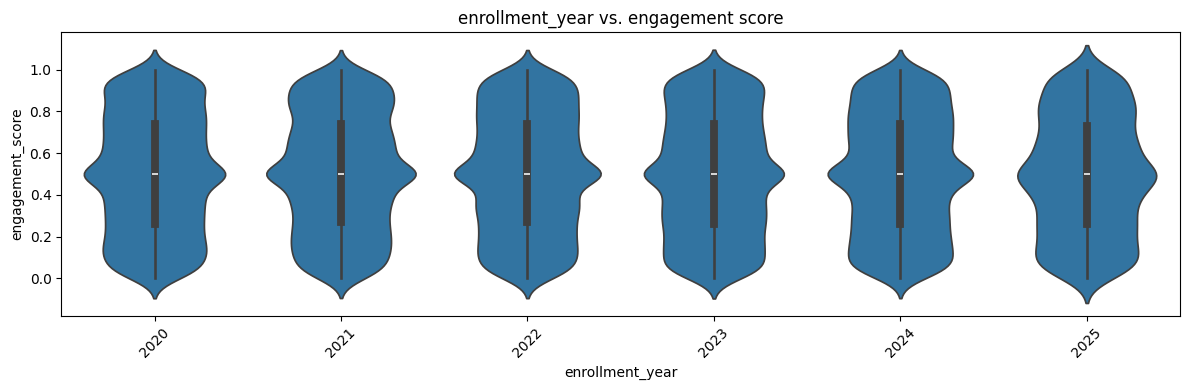

In [49]:
categorical = ['gender', 'country', 'education_level', 'employment_status', 'industry',
              'course_category', 'enrollment_month', 'enrollment_year']


for col in categorical:
    plt.figure(figsize = (12, 4))
    sns.violinplot(data = data, x = col, y = 'engagement_score')
    plt.title(f'{col} vs. engagement score')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show();

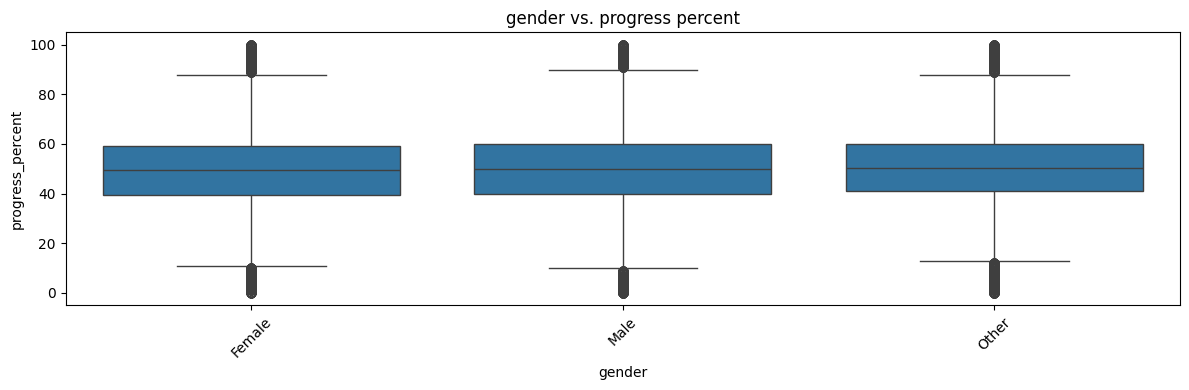

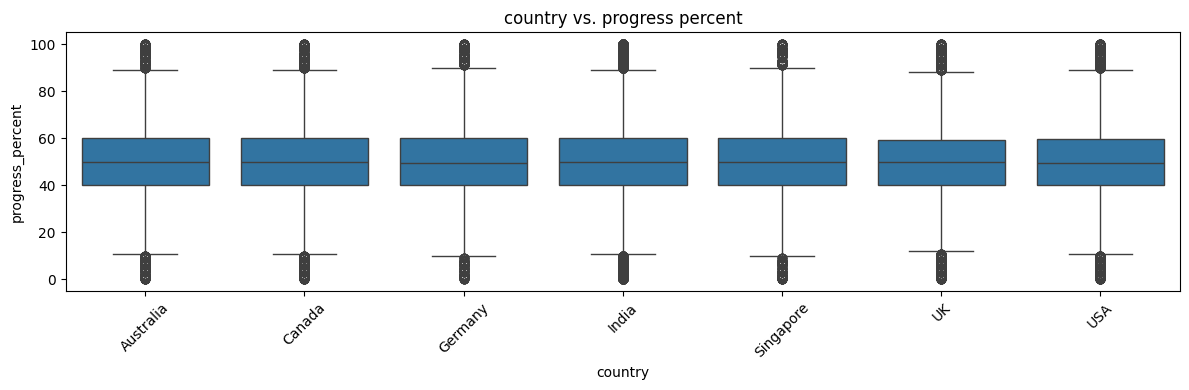

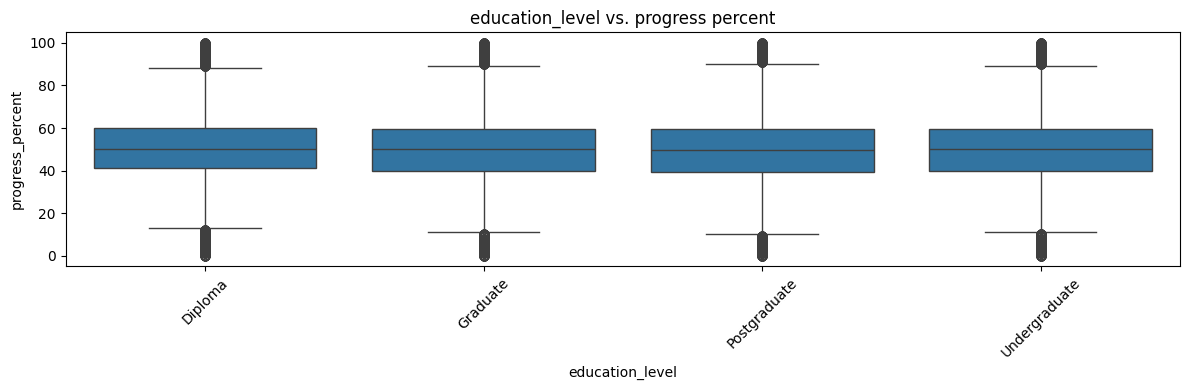

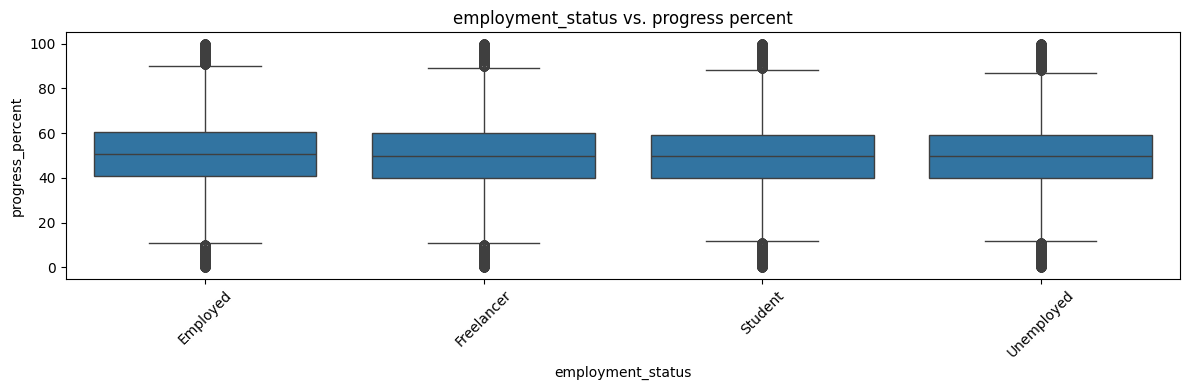

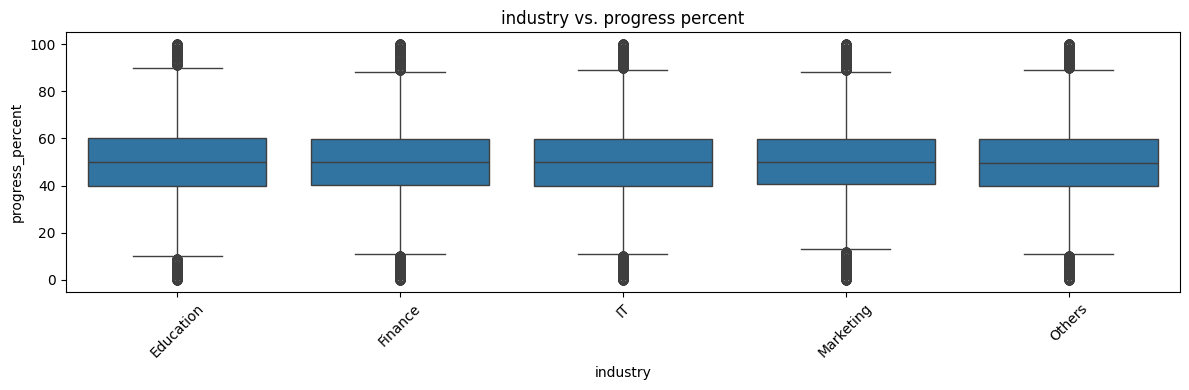

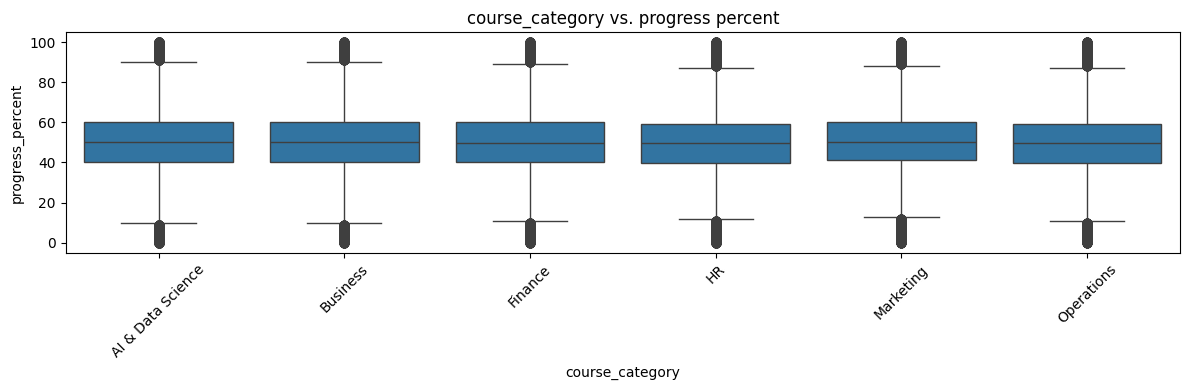

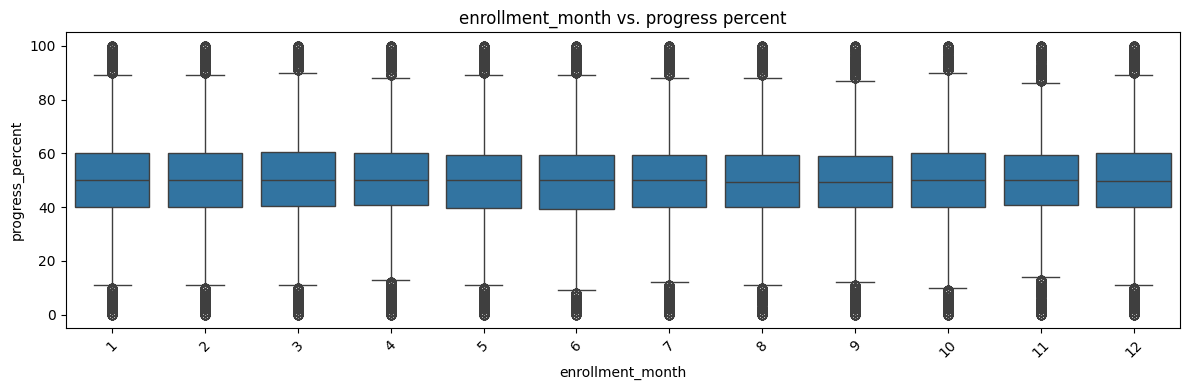

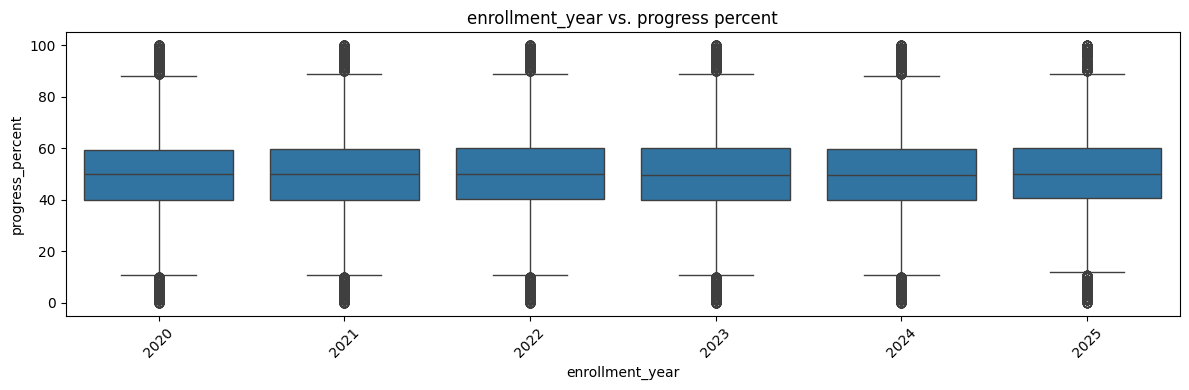

In [50]:
categorical = ['gender', 'country', 'education_level', 'employment_status', 'industry',
              'course_category', 'enrollment_month', 'enrollment_year']


for col in categorical:
    plt.figure(figsize = (12, 4))
    sns.boxplot(data = data, x = col, y = 'progress_percent')
    plt.title(f'{col} vs. progress percent')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show();

#### Conclusion:

The above graphics look very much similar with equal distributions. To get more insights the ANOVA test shall be performed for key features 

#### ANOVA

One-way ANOVA is testing whether group means differ significantly for a continuous variable across categories of a single feature.

For each categorical feature (e.g. gender, country, etc), the hypotheses are:
- Null Hypothesis ($H_0$):
> The **mean engagement score is the same** across all groups of the categorical feature.

- Alternative Hypothesis ($H_1$):
> At least **one group has a different mean engagement score** than the others.

**Example for gender feature:**
- $H_0 : \mu_1 male = \mu_2 female = \mu_3 other$
- $H_1$: At least one of the means is different 

Feature               Target  F-statistic  p-value  Reject H₀
0              gender     engagement_score         0.35   0.7054      False
1             country     engagement_score         1.60   0.1417      False
2     education_level     engagement_score         1.04   0.3715      False
3   employment_status     engagement_score         0.80   0.4957      False
4            industry     engagement_score         1.53   0.1901      False
5     course_category     engagement_score         0.33   0.8981      False
6              gender     progress_percent         5.71   0.0033       True
7             country     progress_percent         0.44   0.8526      False
8     education_level     progress_percent         1.81   0.1425      False
9   employment_status     progress_percent         2.58   0.0516      False
10           industry     progress_percent         0.22   0.9288      False
11    course_category     progress_percent         1.87   0.0954      False
12             gender      attendance_rate         1.78   0.1685      False
13            country      attendance_rate         1.66   0.1261      False
14    education_level      attendance_rate         1.13   0.3367      False
15  employment_status      attendance_rate         0.57   0.6333      False
16           industry      attendance_rate         1.88   0.1108      False
17    course_category      attendance_rate         1.93   0.0851      False
18             gender  satisfaction_rating         0.69   0.5026      False
19            country  satisfaction_rating         1.08   0.3693      False
20    education_level  satisfaction_rating         2.17   0.0892      False
21  employment_status  satisfaction_rating         3.74   0.0106       True
22           industry  satisfaction_rating         1.76   0.1342      False
23    course_category  satisfaction_rating         0.31   0.9060      False

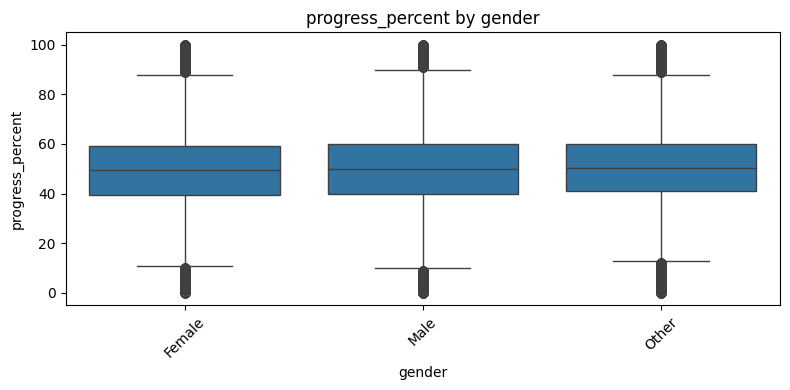

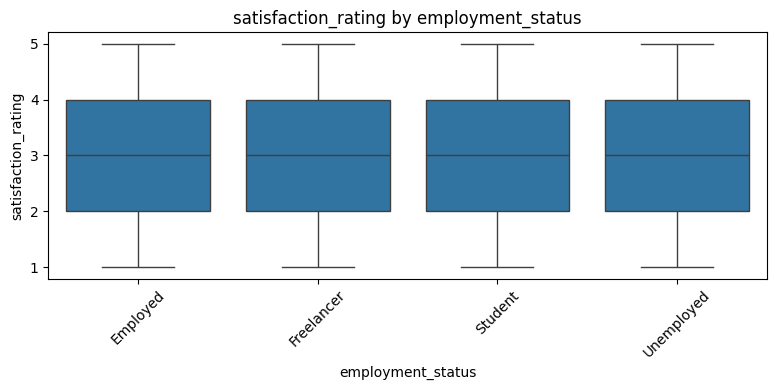

In [51]:
categorical_features = ['gender', 'country', 'education_level', 'employment_status', 'industry', 'course_category']
numerical_targets = ['engagement_score', 'progress_percent', 'attendance_rate', 'satisfaction_rating']

# Store significant results for plotting
significant_results = []

# Run ANOVA and track results
anova_summary = []

for target in numerical_targets:
    for cat in categorical_features:
        groups = [g[target].dropna().values for _, g in data.groupby(cat)]
        if all(len(g) > 1 for g in groups):
            f_stat, p_val = f_oneway(*groups)
            if p_val < 0.05:
                significant_results.append((cat, target))
            anova_summary.append({
                'Feature': cat,
                'Target': target,
                'F-statistic': round(f_stat, 2),
                'p-value': round(p_val, 4),
                'Reject H₀': p_val < 0.05
            })

# Prepare visualizations for significant results
plot_data = []
for cat, target in significant_results:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=cat, y=target)
    plt.title(f'{target} by {cat}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plot_data.append((cat, target))

anova_df = pd.DataFrame(anova_summary)
display(anova_df)

### Relationship of various features with the Engagement Score

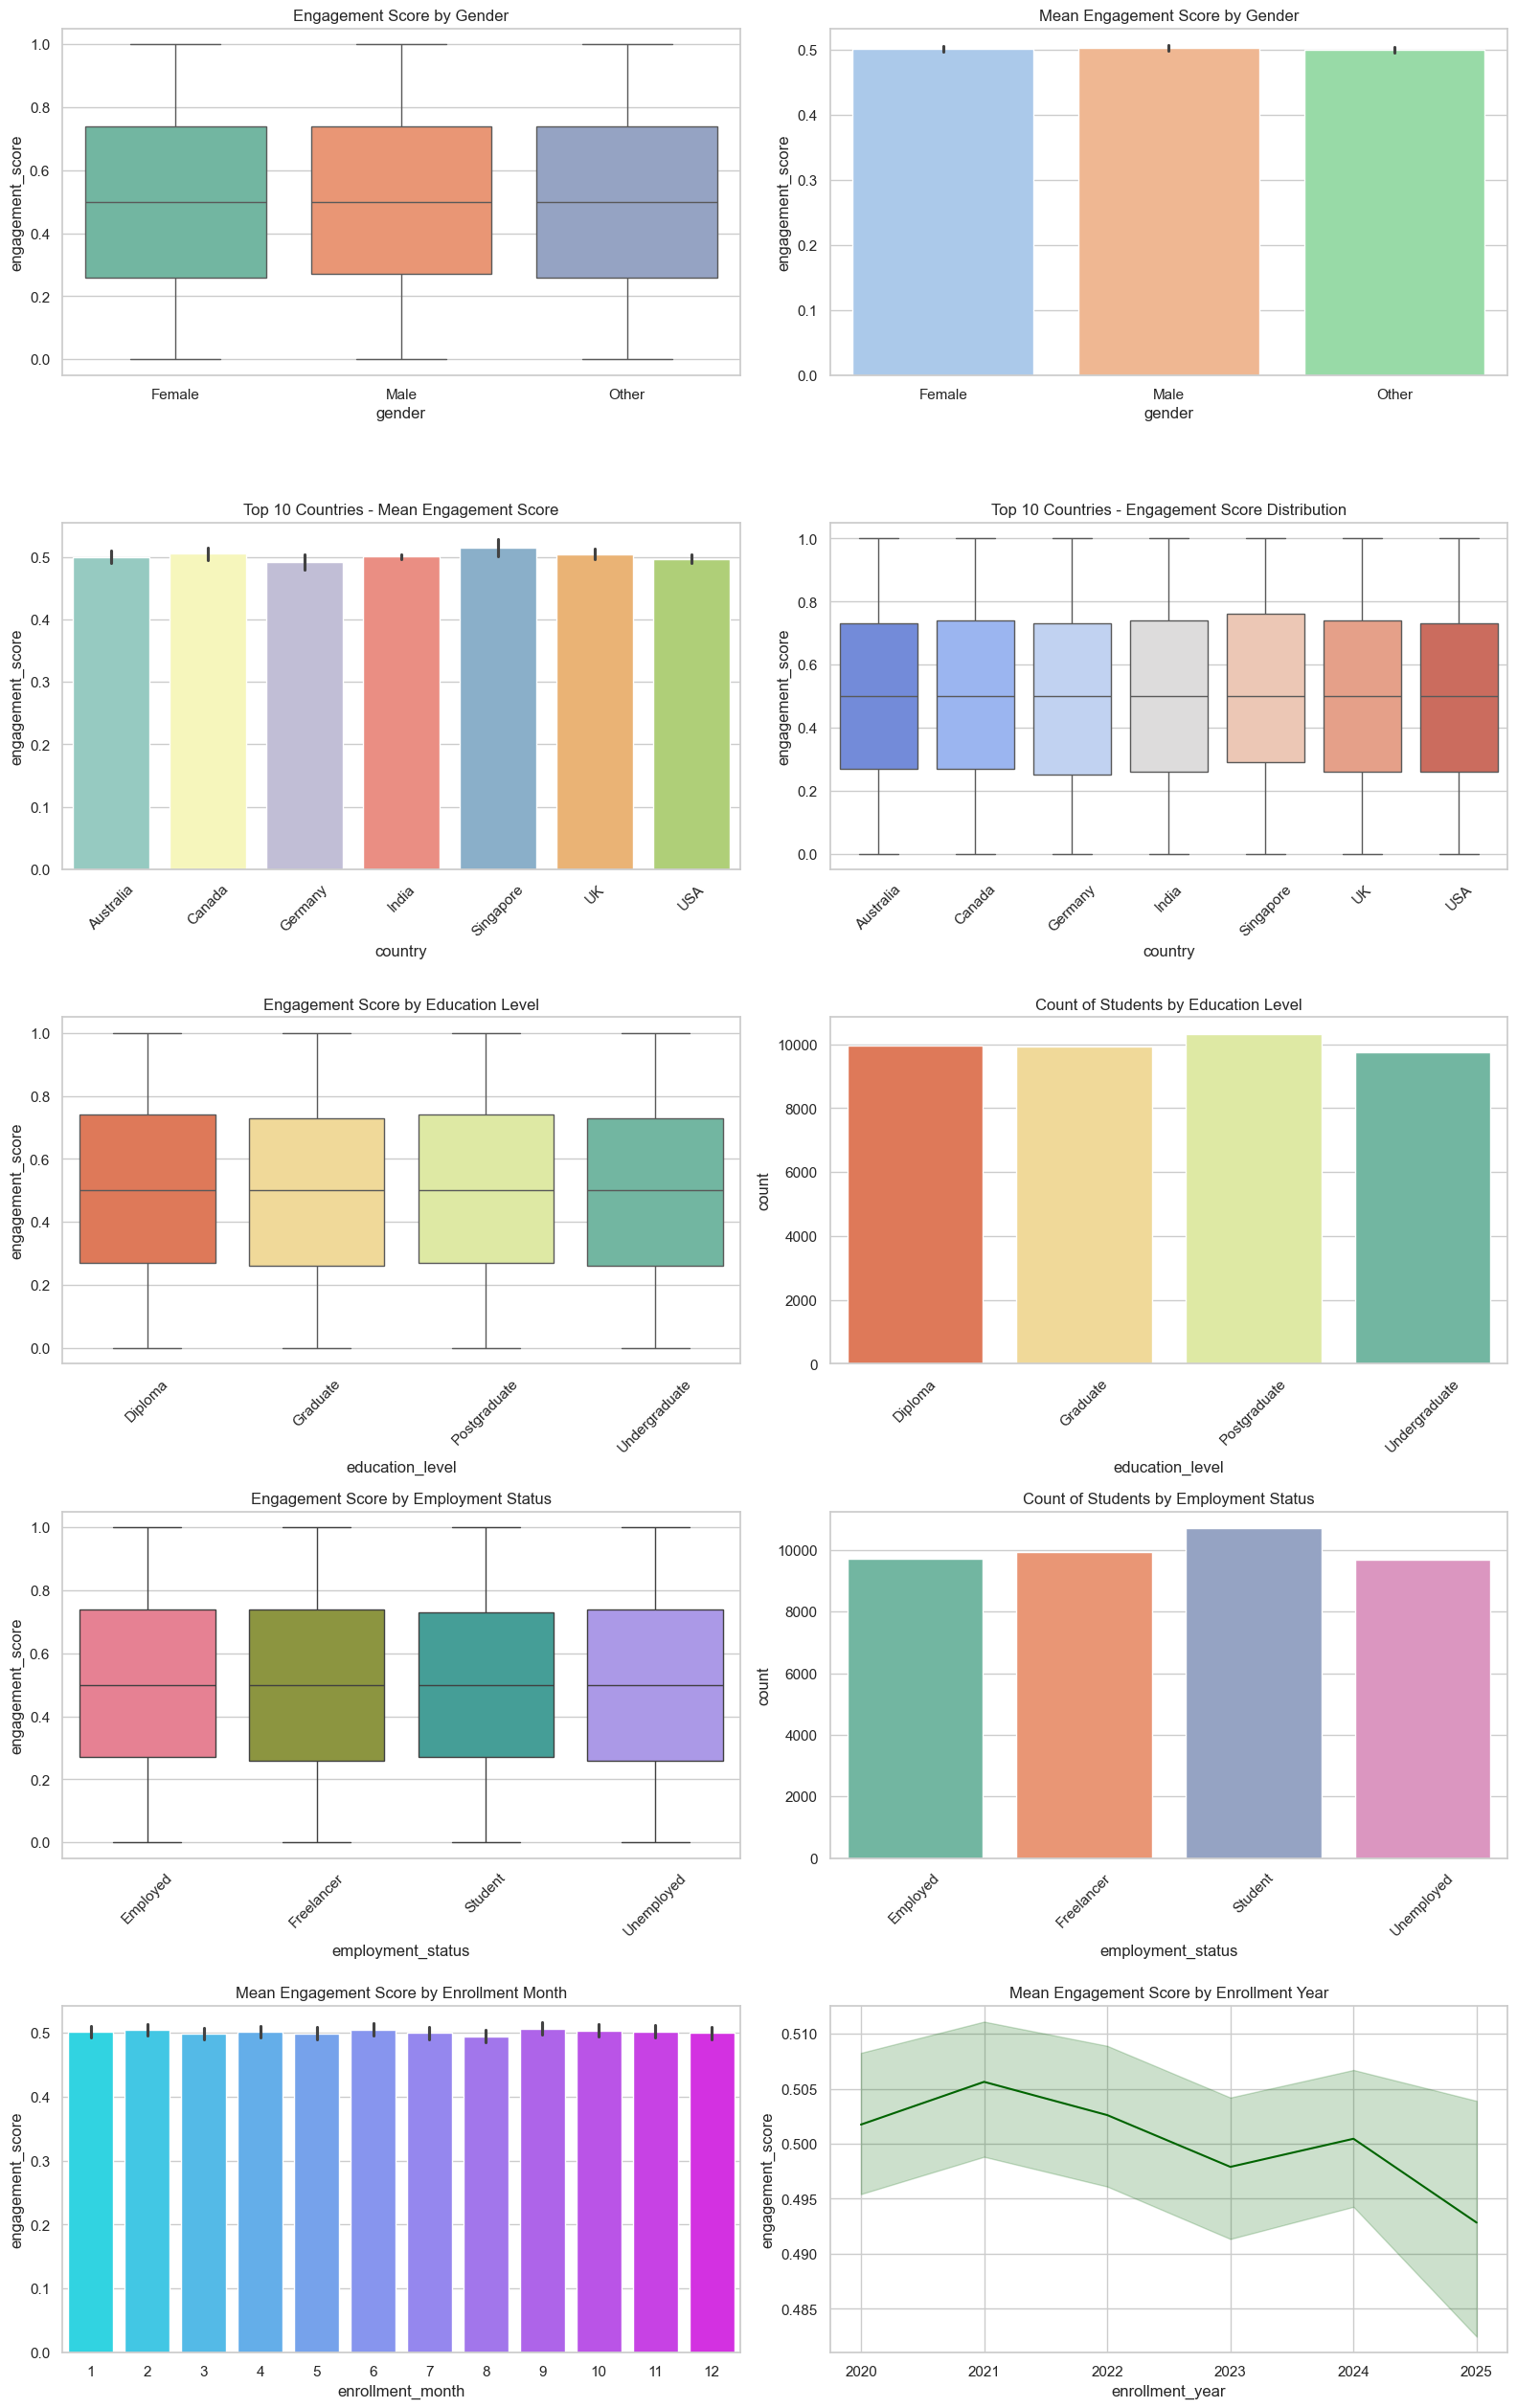

In [52]:
# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 30))

# 1. Gender vs Engagement Score
plt.subplot(6, 2, 1)
sns.boxplot(data = data, x='gender', y = 'engagement_score', palette = 'Set2')
plt.title('Engagement Score by Gender')

plt.subplot(6, 2, 2)
sns.barplot(data = data, x = 'gender', y = 'engagement_score', estimator = 'mean', palette = 'pastel')
plt.title('Mean Engagement Score by Gender')

# 2. Country vs Engagement Score
plt.subplot(6, 2, 3)
top_countries = data['country'].value_counts().nlargest(10).index
sns.barplot(data = data[data['country'].isin(top_countries)], x = 'country', y ='engagement_score', estimator='mean', palette = 'Set3')
plt.title('Top 10 Countries - Mean Engagement Score')
plt.xticks(rotation = 45)

plt.subplot(6, 2, 4)
sns.boxplot(data =  data[data['country'].isin(top_countries)], x = 'country', y = 'engagement_score', palette = 'coolwarm')
plt.title('Top 10 Countries - Engagement Score Distribution')
plt.xticks(rotation=45)

# 3. Education Level vs Engagement Score
plt.subplot(6, 2, 5)
sns.boxplot(data = data, x = 'education_level', y = 'engagement_score', palette = 'Spectral')
plt.title('Engagement Score by Education Level')
plt.xticks(rotation = 45)

plt.subplot(6, 2, 6)
sns.countplot(data = data, x = 'education_level', palette = 'Spectral')
plt.title('Count of Students by Education Level')
plt.xticks(rotation = 45)

# 4. Employment Status vs Engagement Score
plt.subplot(6, 2, 7)
sns.boxplot(data = data, x = 'employment_status', y = 'engagement_score', palette = 'husl')
plt.title('Engagement Score by Employment Status')
plt.xticks(rotation = 45)

plt.subplot(6, 2, 8)
sns.countplot(data = data, x = 'employment_status', palette = 'Set2')
plt.title('Count of Students by Employment Status')
plt.xticks(rotation = 45)

# 5. Enrollment Month vs Mean Engagement Score
plt.subplot(6, 2, 9)
sns.barplot(data = data, x = 'enrollment_month', y = 'engagement_score', estimator = 'mean', palette = 'cool')
plt.title('Mean Engagement Score by Enrollment Month')

# 6. Enrollment Year vs Mean Engagement Score
plt.subplot(6, 2, 10)
sns.lineplot(data = data, x = 'enrollment_year', y = 'engagement_score', estimator = 'mean', color = 'darkgreen')
plt.title('Mean Engagement Score by Enrollment Year')

plt.tight_layout()
plt.show()

#### Conclusion:

All gender groups (Female, Male, Other) show very similar median and distribution of engagement scores. No significant difference in engagement based on gender. Minor variations in mean engagement across contries, but not substantial. Engagement score distributions look highly overlapping. Country has very limited effect on engagement score. Regional behavior differences are negligible in this dataset. Median engagement scores and IQRs are almost identical across Diploma, Graduate, Postgraduate, and Undergraduate. Reasonably balanced count across levels. Educational background does not significantly affect engagement. Slightly higher median engagement for freelancers and students, but overall marginal differences. Students form the largest group. Minor fluctuation month to month; almost flat trend. No clear seasonality in engagement. Slight downward trend from 2021 to 2023, with a dip in 2023 and some recovery in 2024–2025. Slight time trend, possibly due to changes in platform, content, or external factors such as post-pandemic fatigue. 

- Most categorical features show very little variation in engagement score.
- This is consistent with ANOVA test results, which showed no statistically significant differences across these categorical groupings.

### Correlation

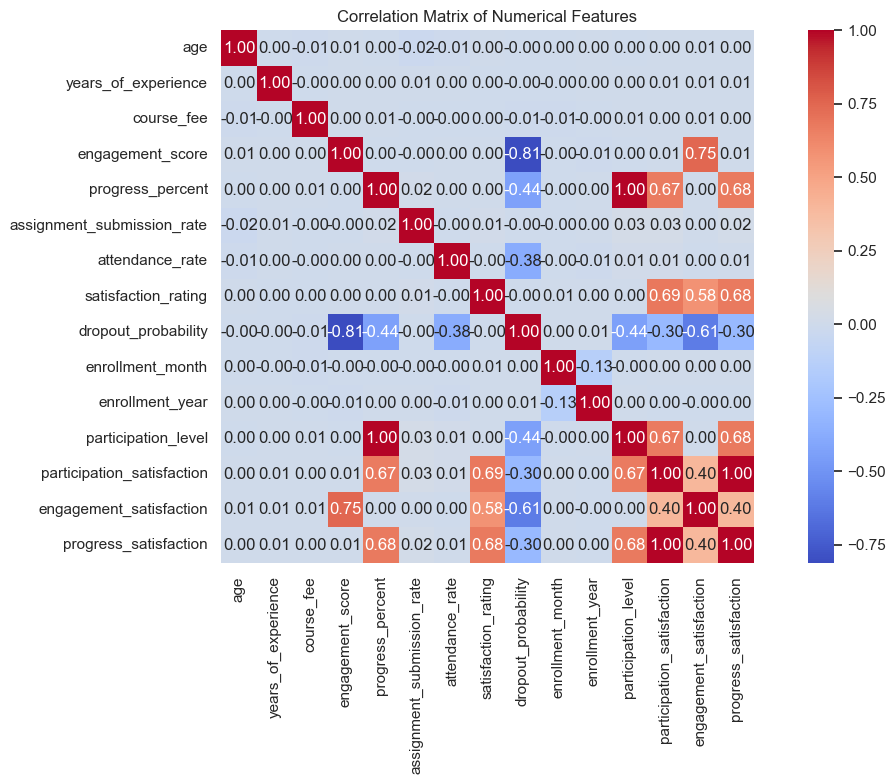

In [53]:
datetime_cols = ['enrollment_date', 'last_active_date', 'active_days']

num_cols = [
    col for col in data.select_dtypes(include = 'number').columns
    if not col.endswith('_missing') and col not in datetime_cols
]

corr = data[num_cols].corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm', square = True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show();

### Review the relationship between dropout_probability & dropout_status

In [54]:
data['dropout_status'].value_counts()

dropout_status
May Leave          22592
Not Likely         16491
Likely to Leave      917
Name: count, dtype: int64

#### Note:

1. **Ivestigating the relationship between**
- dropout_probability (continuous numeric)
- dropout_status (categorical: May Leave, Not Likely, Likely to Leave)
  
2. **Evaluating whether dropout_status should be used as a feature in modeling dropout_probability** to avoid leakage. 

#### 1. Explore relationship

To visually assess how probability is distributed across status categories.

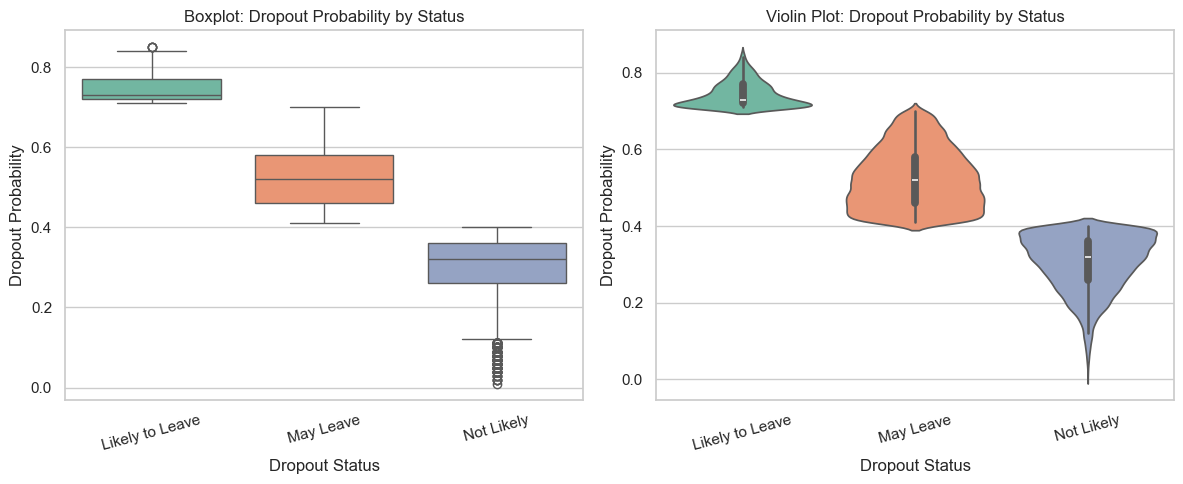

In [55]:
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data = data, x = 'dropout_status', y = 'dropout_probability', palette = 'Set2')
plt.title('Boxplot: Dropout Probability by Status')
plt.xlabel('Dropout Status')
plt.ylabel('Dropout Probability')
plt.xticks(rotation = 15)

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(data = data, x = 'dropout_status', y = 'dropout_probability', palette = 'Set2')
plt.title('Violin Plot: Dropout Probability by Status')
plt.xlabel('Dropout Status')
plt.ylabel('Dropout Probability')
plt.xticks(rotation = 15)

plt.tight_layout()
plt.show();

#### 2. ANOVA Test

To statistically assess whether the means of probability differ by dropout status

In [56]:
groups = [g['dropout_probability'] for _, g in data.groupby('dropout_status')]

if all(len(g) > 1 for g in groups):
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("\nSignificant difference in dropout probability across dropout status groups.")
    else:
        print("\nNo significant difference.")

ANOVA F-statistic = 49619.13, p-value = 0.0000

Significant difference in dropout probability across dropout status groups.


#### 3. Threshold check and Visual Inspection

To check whether dropout status is derived from dropout probability

- dropout_probability < 0.3 -> 'Not Likely'
- 0.3 <= dropout_probability <= 0.7 -> 'May Leave'
- dropput_probability > 0.7 -> 'Likely to Leave'

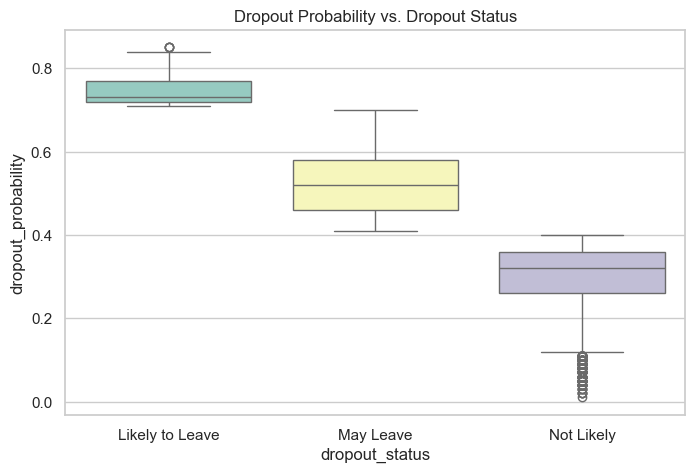

                 count      mean   min   max
dropout_status                              
Not Likely       16491  0.304980  0.01  0.40
May Leave        22592  0.525490  0.41  0.70
Likely to Leave    917  0.744111  0.71  0.85

Match rate between generated and original status: 74.83%

Examples of mismatches:

    dropout_probability dropout_status status_from_prob
0                  0.38     Not Likely        May Leave
3                  0.36     Not Likely        May Leave
21                 0.40     Not Likely        May Leave
30                 0.32     Not Likely        May Leave
38                 0.37     Not Likely        May Leave


In [57]:
# Map ordinal categories to numbers for clarity

status_map = {'Not Likely': 0, 'May Leave': 1, 'Likely to Leave': 2}
data['dropout_status_encoded'] = data['dropout_status'].map(status_map)

# Visualize relationship

plt.figure(figsize = (8, 5))
sns.boxplot(data = data, x = 'dropout_status', y = 'dropout_probability', palette = 'Set3')
plt.title('Dropout Probability vs. Dropout Status')
plt.show();

# Analyze average dropout_probability per status

status_summary = data.groupby('dropout_status')['dropout_probability'].agg(['count', 'mean', 'min', 'max']).sort_values('mean')
print(status_summary)

# Check if there's a clean rule for example, by threshold
def check_threshold(row):
    if row['dropout_probability'] < 0.3:
        return 'Not Likely'
    elif row['dropout_probability'] <= 0.7:
        return 'May Leave'
    else:
        return 'Likely to Leave'

data['status_from_prob'] = data.apply(check_threshold, axis=1)

# Compare generated vs original

comparison = (data['status_from_prob'] == data['dropout_status']).mean()
print(f"\nMatch rate between generated and original status: {comparison:.2%}")

mismatches = data[data['status_from_prob'] != data['dropout_status']][['dropout_probability', 'dropout_status', 'status_from_prob']]
print("\nExamples of mismatches:\n")
print(mismatches.head())

### Conclusion:

There is a clear seperation in dropout probability across the three dropout status groups:
- Likely to Leave: Highest droupout probability
- May Leave: Mid-range probability
- Not Likely: Lowest dropout probability

The violin plot confirms that the distributions are distinct with minimal overlap.

ANOVA Test indicates a statistically significant difference between group means. Reject the null hypothesis: there is a significant differenct in dropout probability based on dropout status.

The match rate between generated and original status is ~ 73,83%. This shows a strong correlation, but not perfect alignment (around 25% discrepency).

Using dropout_status as a predictor in a model to estimate dropout_probability would result in data leakage.

## Transfromation

In [58]:
# Convert timedelta into int

data['active_days'] = data['active_days'].dt.days

In [59]:
# Drop unnecessary columns

columns_to_drop = ['student_id', 'course_name', 'student_name', 'state', 'dropout_status', 'dropout_status_encoded',
                  'status_from_prob', 'enrollment_date', 'last_active_date']

data.drop(columns = columns_to_drop, inplace = True)

In [60]:
df = data.copy()

In [61]:
View(df[1500:2000])

In [62]:
# Encoding categorical features

ordinal_variable = ['education_level', 'course_fee_bin']
education_order = ['Undergraduate', 'Graduate', 'Postgraduate', 'Diploma']
fee_bin_order = ['low', 'medium', 'high', 'premium']

or_enc = OrdinalEncoder(categories = [education_order, fee_bin_order])
df[ordinal_variable] = or_enc.fit_transform(df[ordinal_variable])

nominal_variable = ['gender', 'country', 'industry', 'employment_status', 'course_category', 'satisfaction_bucket']
ohe = OneHotEncoder()
ohe_enc = ohe.fit_transform(df[nominal_variable]).toarray()
ohe_feature_names = ohe.get_feature_names_out(nominal_variable)

print(f"Encoded shape: {ohe_enc.shape}, Feature names: {len(ohe_feature_names)}")

df_ohe = pd.DataFrame(ohe_enc, columns = ohe_feature_names)

df = df.drop(columns = nominal_variable)
df = pd.concat([df, df_ohe], axis = 1)

Encoded shape: (40000, 28), Feature names: 28


### Selecting Features

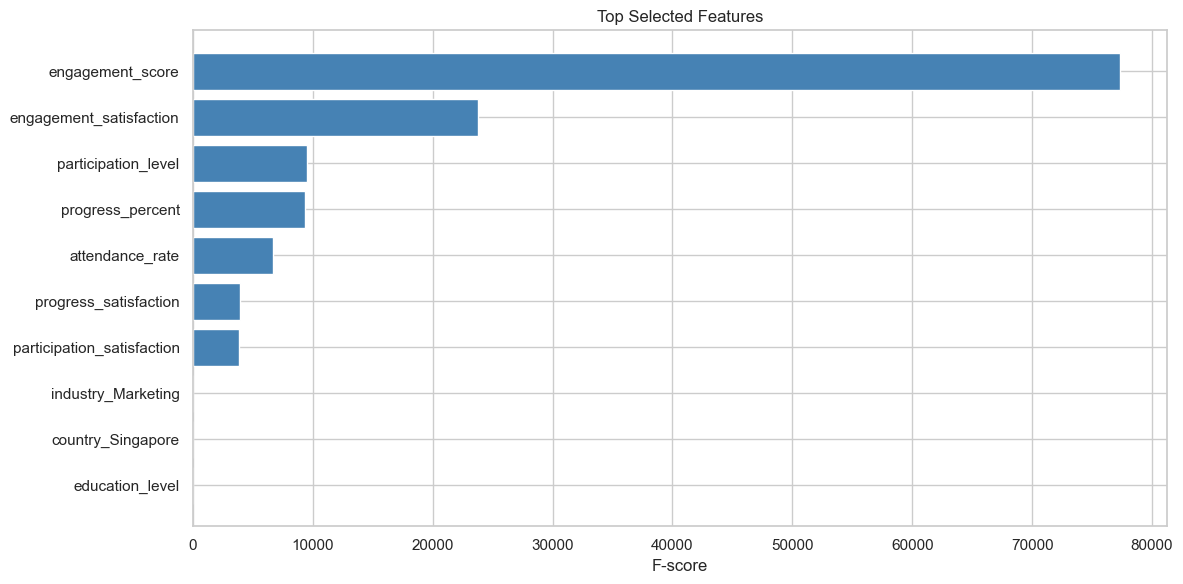

Feature         Score   p-Value  Selected
4                    engagement_score  77345.987105  0.000000      True
18            engagement_satisfaction  23747.185435  0.000000      True
16                participation_level   9493.177381  0.000000      True
5                    progress_percent   9338.710570  0.000000      True
7                     attendance_rate   6669.916817  0.000000      True
19              progress_satisfaction   3921.498192  0.000000      True
17         participation_satisfaction   3885.004867  0.000000      True
33                 industry_Marketing      6.364543  0.011646      True
27                  country_Singapore      6.249726  0.012425      True
1                     education_level      3.729324  0.053472      True
34                    industry_Others      3.674413  0.055261     False
35         employment_status_Employed      3.210312  0.073183     False
29                        country_USA      2.470982  0.115973     False
13                    enrollment_year      2.362210  0.124314     False
44         course_category_Operations      2.323616  0.127431     False
31                   industry_Finance      2.248748  0.133730     False
15                     course_fee_bin      1.831751  0.175929     False
21                        gender_Male      1.679270  0.195029     False
25                    country_Germany      1.420005  0.233410     False
20                      gender_Female      1.286356  0.256727     False
36       employment_status_Freelancer      1.223664  0.268649     False
3                          course_fee      1.151782  0.283183     False
37          employment_status_Student      1.092037  0.296027     False
32                        industry_IT      1.048095  0.305952     False
41            course_category_Finance      1.031529  0.309806     False
11                        active_days      1.018095  0.312977     False
2                 years_of_experience      0.973097  0.323915     False
26                      country_India      0.891320  0.345126     False
23                  country_Australia      0.756609  0.384397     False
39  course_category_AI & Data Science      0.681150  0.409196     False
42                 course_category_HR      0.647292  0.421087     False
0                                 age      0.538645  0.462999     False
8                 satisfaction_rating      0.537200  0.463600     False
12                   enrollment_month      0.350188  0.554010     False
40           course_category_Business      0.189583  0.663267     False
43          course_category_Marketing      0.173066  0.677404     False
38       employment_status_Unemployed      0.162447  0.686916     False
28                         country_UK      0.139228  0.709052     False
9         years_of_experience_missing      0.108270  0.742124     False
24                     country_Canada      0.093039  0.760351     False
46            satisfaction_bucket_low      0.057721  0.810136     False
30                 industry_Education      0.030230  0.861971     False
22                       gender_Other      0.030061  0.862353     False
47         satisfaction_bucket_medium      0.019654  0.888509     False
45           satisfaction_bucket_high      0.012932  0.909462     False
6          assignment_submission_rate      0.000781  0.977711     False
14        satisfaction_rating_missing      0.000000  1.000000     False
10           progress_percent_missing      0.000000  1.000000     False

In [63]:
# Top Features Selected by f_regression (based on p-values and scores)

X_chosen = df.drop(['dropout_probability'], axis = 1)
y_chosen = df['dropout_probability']

selector = SelectKBest(score_func = f_regression, k = 10)
X_selected = selector.fit_transform(X_chosen, y_chosen)

selected_mask = selector.get_support()
selected_features = X_chosen.columns[selected_mask]

feature_scores = pd.DataFrame({
    'Feature': X_chosen.columns,
    'Score':selector.scores_,
    'p-Value':selector.pvalues_,
    'Selected':selected_mask
}).sort_values(by = 'Score', ascending = False)

selected_feature_scores = feature_scores[feature_scores['Selected']]
plt.figure(figsize = (12, 6))
plt.barh(selected_feature_scores['Feature'], selected_feature_scores['Score'], color = 'steelblue')
plt.xlabel('F-score')
plt.title('Top Selected Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show();

display(feature_scores)

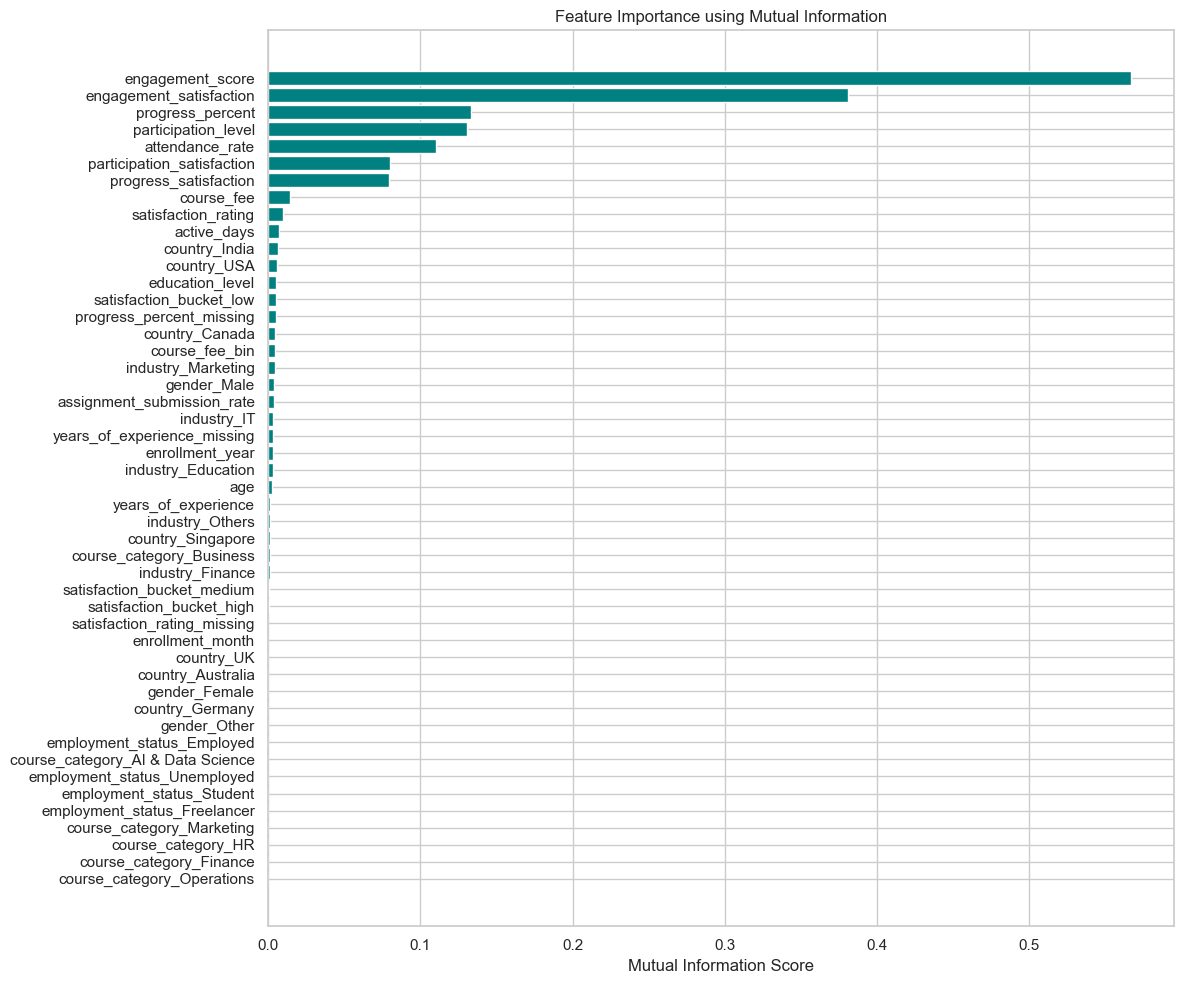

Feature  MI_Score
0                    engagement_score  0.566594
1             engagement_satisfaction  0.380607
2                    progress_percent  0.133229
3                 participation_level  0.130779
4                     attendance_rate  0.110370
5          participation_satisfaction  0.080273
6               progress_satisfaction  0.079153
7                          course_fee  0.014156
8                 satisfaction_rating  0.010040
9                         active_days  0.007268
10                      country_India  0.006668
11                        country_USA  0.005838
12                    education_level  0.005416
13            satisfaction_bucket_low  0.005349
14           progress_percent_missing  0.005037
15                     country_Canada  0.004668
16                     course_fee_bin  0.004602
17                 industry_Marketing  0.004484
18                        gender_Male  0.004086
19         assignment_submission_rate  0.003893
20                        industry_IT  0.003382
21        years_of_experience_missing  0.003327
22                    enrollment_year  0.003258
23                 industry_Education  0.002847
24                                age  0.002426
25                years_of_experience  0.001335
26                    industry_Others  0.001262
27                  country_Singapore  0.001259
28           course_category_Business  0.001233
29                   industry_Finance  0.000960
30         satisfaction_bucket_medium  0.000597
31           satisfaction_bucket_high  0.000379
32        satisfaction_rating_missing  0.000000
33                   enrollment_month  0.000000
34                         country_UK  0.000000
35                  country_Australia  0.000000
36                      gender_Female  0.000000
37                    country_Germany  0.000000
38                       gender_Other  0.000000
39         employment_status_Employed  0.000000
40  course_category_AI & Data Science  0.000000
41       employment_status_Unemployed  0.000000
42          employment_status_Student  0.000000
43       employment_status_Freelancer  0.000000
44          course_category_Marketing  0.000000
45                 course_category_HR  0.000000
46            course_category_Finance  0.000000
47         course_category_Operations  0.000000

In [64]:
# Top Features by Mutual Information: capture non-linear relationships

mi = mutual_info_regression(X_chosen, y_chosen, random_state = 42)
mi_scores = pd.Series(mi, index = X_chosen.columns).sort_values(ascending = False)

mi_df = pd.DataFrame({
    'Feature' : mi_scores.index,
    'MI_Score' : mi_scores.values
})

plt.figure(figsize = (12, 10))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color = 'teal')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance using Mutual Information')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show();

display(mi_df)

### Conclusion:

There is a strong agreement on top 6-7 features between the two methods.

Based on both f_regression and MI, the most predictive features are:

|**Selected by**|**Features**|
|--|--|
|Both methods|engagement_score, engagement_satisfaction, progress_percent, participation_level, attendance_rate, progress_satisfaction, participation_satisfaction|
|MI only (marginal)|active_days, course_fee|

**Next Steps**:
1. Create baseline RandomForestRegressor based on all features
2. Create baseline RandomForestRegressor based on top 9 features selected by both algorithms

In [65]:
View(df[2000:2500])

## Baseline Model and Solution Method Review

In [66]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
    print('Train RMSE: {:.3f}'. format(metrics.root_mean_squared_error(y_train, y_train_pred)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
    print('Test RMSE: {:.3f}'.format(metrics.root_mean_squared_error(y_test, y_test_pred)))

In [67]:
# Scale numerical features for Linear Regression

target_col = 'dropout_probability'
feature_col = df.columns.difference([target_col])

numerical_features = df[feature_col].select_dtypes(include = ['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X_lr = df.drop(columns = target_col)
y_lr = df[target_col]

In [68]:
# LinearRegressor on ALL features

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size = 0.25, random_state = 42)

lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

y_train_pred = lr_all.predict(X_train)
y_test_pred = lr_all.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.987
Train MAE: 0.011
Train RMSE: 0.016


Test R^2: 0.987
Test MAE: 0.011
Test RMSE: 0.016


In [69]:
# LinearRegressor on on 9 features selected with MI

selected_features = ['engagement_score', 'engagement_satisfaction', 'participation_level', 
                    'progress_percent', 'attendance_rate', 'progress_satisfaction',
                    'participation_satisfaction', 'active_days', 'course_fee']

X_lr_selected = df[selected_features]
y_lr_selected = df['dropout_probability']

X_train, X_test, y_train, y_test = train_test_split(X_lr_selected, y_lr_selected,
                                                   test_size = 0.25, random_state = 42)

lr_selected = LinearRegression()
lr_selected.fit(X_train, y_train)

y_train_pred = lr_selected.predict(X_train)
y_test_pred = lr_selected.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.987
Train MAE: 0.011
Train RMSE: 0.016


Test R^2: 0.987
Test MAE: 0.011
Test RMSE: 0.016


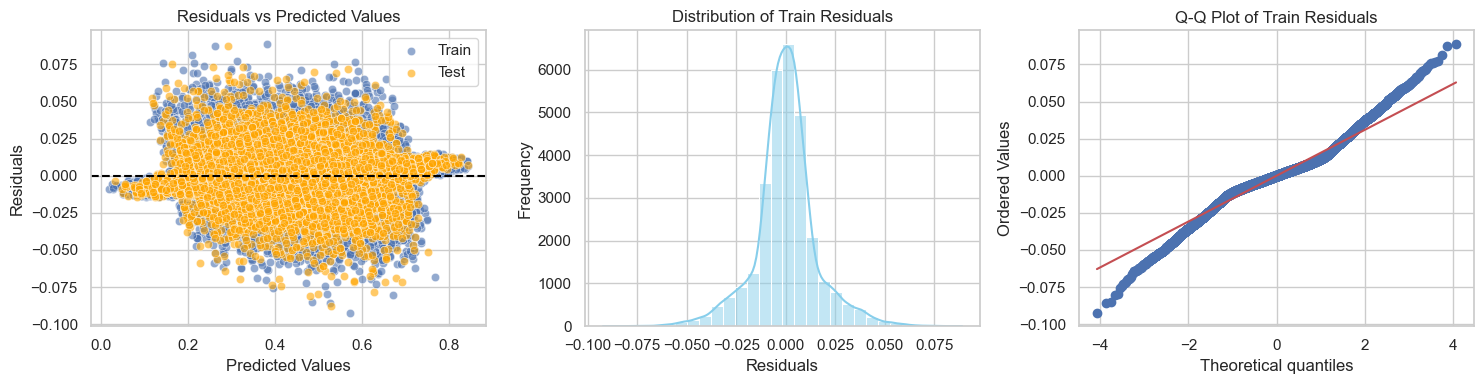

In [70]:
# Residual Analysis for Linear Regression on selected features

y_train_pred = lr_selected.predict(X_train)
y_test_pred = lr_selected.predict(X_test)

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x = y_train_pred, y = train_residuals, label = 'Train', alpha = 0.6)
sns.scatterplot(x = y_test_pred, y = test_residuals, label = 'Test', alpha = 0.6, color = 'orange')
plt.axhline(0, linestyle = '--', color = 'black')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
sns.histplot(train_residuals, kde = True, bins = 30, color = 'skyblue')
plt.title('Distribution of Train Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3)
stats.probplot(train_residuals, dist = 'norm', plot = plt)
plt.title('Q-Q Plot of Train Residuals')
plt.grid(True)

plt.tight_layout()
plt.show();

#### Conclusion:

1. **Residuals vs Predicted Values**
The residuals are randomly scattered around the horizontal line at 0. There is no clear pattern, curve, or funnel shape. Both train and test residuals appear similar in spread and distribution.

This indicates that the model satisfies the linearity assumption (for example, the model is capturing the linear relationship well). The homoscedasticity (constant variance of residuals) looks reasonable; there is no clear sign of heteroscedasticity.

2. **Distributionof Train Residuals**
The residuals are approximately bell-shaped and centered at zero. A slight left skew may be present, but it's minor. The histogram is symmetric with no extreme outliers.

The residuals are approximately normally distributed, which is good for inference. This supports the normality assumption of residuals in linear regression.

3. **Q-Q Plot**
The ppoints follow the red reference line quite closely for the central quantiles. Slight deviations occur at the tails, but this is not severe.

This again supports the assumption of normality of residuals. Minor deviations at the tails are common in real-world data and not alarming.

In [71]:
# RandomForest Regressor on ALL features

X = df.drop(['dropout_probability'], axis = 1)
y = df['dropout_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

rf_reg_all = ensemble.RandomForestRegressor(n_estimators = 500, random_state = 42)
rf_reg_all.fit(X_train, y_train)

y_train_pred = rf_reg_all.predict(X_train)
y_test_pred = rf_reg_all.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.999
Train MAE: 0.003
Train RMSE: 0.005


Test R^2: 0.992
Test MAE: 0.008
Test RMSE: 0.013


#### Conclusion: 

The results are too perfect for initial model run. Detection of leakage shall be performed 

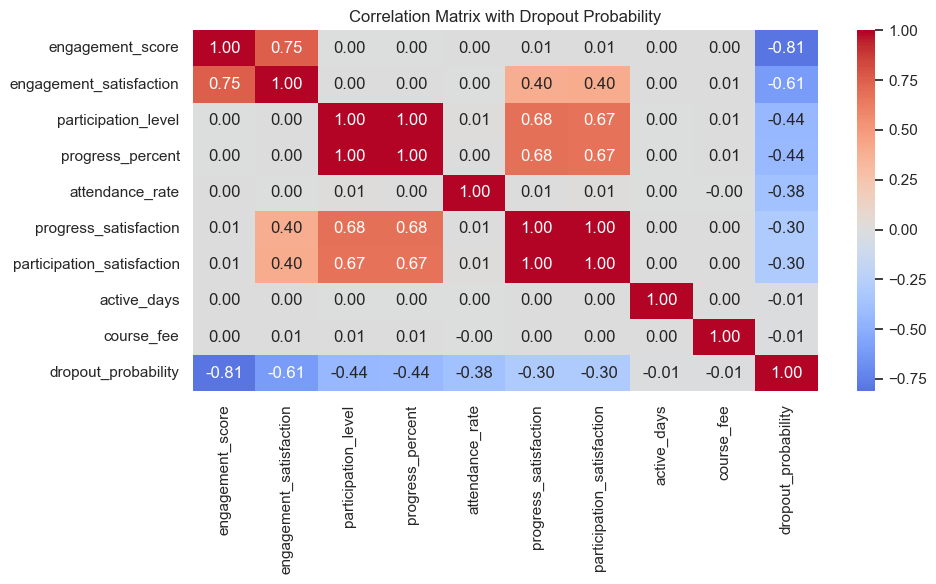

In [72]:
# Correlation matrix, in order to detect multicorrelation

features = ['engagement_score', 'engagement_satisfaction', 'participation_level', 'progress_percent',
           'attendance_rate', 'progress_satisfaction', 'participation_satisfaction', 'active_days',
           'course_fee', 'dropout_probability']

corr_df = df[features]

corr_matrix = corr_df.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', center = 0)
plt.title('Correlation Matrix with Dropout Probability')
plt.tight_layout()
plt.show();

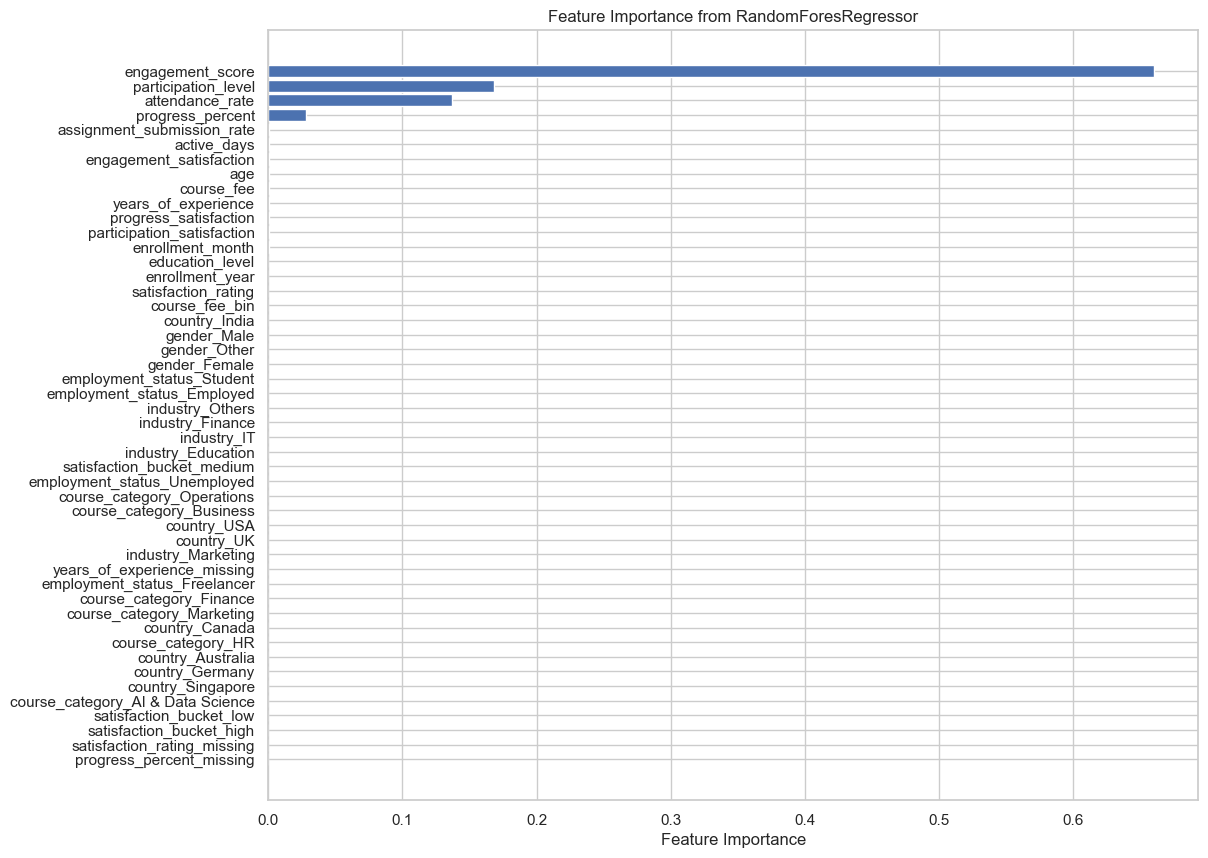

In [73]:
# Feature Importances by Random Forest 

importances = rf_reg_all.feature_importances_
feature_names = X_train.columns
feature_importances = dict(zip(feature_names, importances))

feat_imp_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : importances
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (12, 10))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForesRegressor')
plt.gca().invert_yaxis()
plt.show();

In [74]:
# RandomForest Regressor on 9 features selected with MI

selected_features = ['engagement_score', 'engagement_satisfaction', 'participation_level', 
                    'progress_percent', 'attendance_rate', 'progress_satisfaction',
                    'participation_satisfaction', 'active_days', 'course_fee']

X_rf_reg_selected = df[selected_features]
y_rf_reg_selected = df['dropout_probability']

X_train, X_test, y_train, y_test = train_test_split(X_rf_reg_selected, y_rf_reg_selected,
                                                   test_size = 0.25, random_state = 42)

rf_reg_selected = ensemble.RandomForestRegressor(n_estimators = 500, random_state = 42)
rf_reg_selected.fit(X_train, y_train)

y_train_pred = rf_reg_selected.predict(X_train)
y_test_pred = rf_reg_selected.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.999
Train MAE: 0.003
Train RMSE: 0.004


Test R^2: 0.992
Test MAE: 0.008
Test RMSE: 0.013


#### Conclusion:

1. Linear Regression (All vs Slected Features)
    - Identical Results in all metrics: this suggests that the remaining features beyond the nine selected ones do not contribute additional predictive power for Linear Regression. This is good - it conforms the MI-selected features are sufficiently informative.
      
    - No signs of overfitting: train and test scores are aligned, which is expected for a simple model like Linear Regression.

2. Random Forest Regressor (All vs Selected Features)
    - Again, identical results for both feature sets. This furher reinforces the effectiveness of nine MI-selected features.
    - Much better performance than Linear Regression:
        - Lower MAE and RMSE
        - Higher $R_2$ on both train and test sets
    - Very small generalization gap (Train $R_2$ = 0.999 vs Test $R_2$ = 0.992), which is acceptable and shows strong generalization with minimal overfitting

Key Conclusions:

1. Feature Selection: Nine MI-selected features are as good as the full feature set. This improves model interpretability without sacrificing performance.
   
2. Model Choice: Random Forest outperforms Linear Regression in every aspect - this is expected, especially for nonlinear relationships. Since dropout behavior is likely influenced by nonlinear and interaction effects, tree-based methods are more suitable.
   
3. Baseline Models: The results provide an excellent starting benchmark. Random Forest with nine features is the best compact model in terms of performance and simplicity.

It is worth to run Cross-Validation to assess the stability and generalization and Hyperparameters Tuning to get the best results.

## Model evaluation and Optimization

### 1. Cross-Validation

In [75]:
scores = cross_val_score(rf_reg_selected, X_rf_reg_selected, y_rf_reg_selected,
                        scoring = 'r2', cv = 5)

print('Cross - validated R2 scores:', scores)
print('Mean CV R2:', scores.mean())

Cross - validated R2 scores: [0.99215937 0.99230372 0.99225106 0.99221564 0.99246666]
Mean CV R2: 0.9922792880533395


#### Conclusion:
The mean $R_2$ is the same as the model test $R_2$ (~ 0.99), the model is stable.

### 2. Hyperparameters Tuning

In [76]:
param_dist = {
    'n_estimators' : randint(100, 1000),
    'max_depth' : [None] + list(range(5, 30)),
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2']
}

random = RandomizedSearchCV(
    rf_reg_selected, param_distributions = param_dist, 
    n_iter = 30, cv = 5, scoring = 'r2', random_state = 42, n_jobs = -1
)

random.fit(X_train, y_train)

print('Best Parameters:', random.best_params_)

Best Parameters: {'max_depth': 28, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 437}


## Deployment

In [77]:
# FINAL MODEL

selected_features = ['engagement_score', 'engagement_satisfaction', 'participation_level', 
                    'progress_percent', 'attendance_rate', 'progress_satisfaction',
                    'participation_satisfaction', 'active_days', 'course_fee']

X_final = df[selected_features]
y_final = df['dropout_probability']

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

rf_reg_final = ensemble.RandomForestRegressor(n_estimators = 437,
                                              max_depth = 28, 
                                              max_features = 'sqrt',
                                              min_samples_leaf = 1,
                                              min_samples_split = 2,
                                              random_state = 42)
rf_reg_final.fit(X_train, y_train)

y_train_pred = rf_reg_final.predict(X_train)
y_test_pred = rf_reg_final.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.999
Train MAE: 0.003
Train RMSE: 0.005


Test R^2: 0.991
Test MAE: 0.009
Test RMSE: 0.013


**SHAP** (SHapley Additive exPlanations) is a powerful and widely used framework for **interpreting machine learning models**. It explains the **contribution of each feature** to an individual prediction based on **game theory**. 

SHAP assigns each feature an importance value for a particular prediction, based on the concept of **Shapley values** from cooperative game theory, which fairly distributes 'payouts'(in this case, model prediction) among 'players' (features).

SHAP is the global standard for interpretable machine learning, allowing to open black box of complex models like Random Forest and understand how each feature influences predictions.

100%|===================| 39999/40000 [238:56<00:00]         

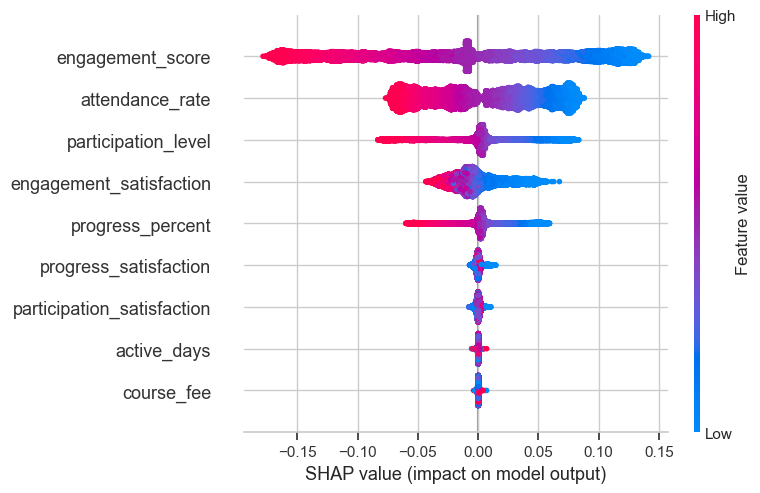

In [78]:
X_shap = df[selected_features]

explainer = shap.Explainer(rf_reg_final, X_shap)
shap_values = explainer(X_shap)
shap.summary_plot(shap_values, X_shap)

#### Conclusion:

The SHAP beeswarm plot shows the impact of each feature on the dropout probability predicted by Random Forest Regressor.

1. **Engagement Score**
    - High engagement score (red) strongly reduces dropout probability
    - Low engagement score (blue) strongly increases dropout probability
> This is a critical driver of success

2. **Attendance Rate & Participation Level**
    - Similarly, high values reduce dropout risk
    - These features show a clear monotonic pattern.
  
3. **Engagement Satisfaction & Progress Percent**
    - Still important but slightly less impactful
    - Distributions are centered around zero with moderate SHAP spread.
  
4. **Active days & Course Fee**
    - These have almost no effect on the predictions

### Simulating Real-World Performance

To simulate values within the distributios of 9 input features by sampling feature values from the actual data distributions, preserving their statistical characteristics. Then, compare and inspect predictions for plausibility.

In [79]:
real_data = df[selected_features]

cov_estimator = EmpiricalCovariance()
cov_estimator.fit(real_data)

mean_vector = real_data.mean().values
cov_matrix = cov_estimator.covariance_

N = 1000
synthetic_samples = multivariate_normal.rvs(mean = mean_vector, cov = cov_matrix, size = N)
simulation = pd.DataFrame(synthetic_samples, columns = real_data.columns)
simulation = simulation.clip(lower = 0)

predicted_dropout = rf_reg_final.predict(simulation)

simulation['Predicted_Dropout_Probability'] = predicted_dropout

def classify_dropout_status(prob):
    if prob >= 0.71:
        return 'Likely to Leave'
    elif prob >=0.41:
        return 'May Leave'
    else:
        return 'Not Likely'

simulation['Predicted Status'] = simulation['Predicted_Dropout_Probability'].apply(classify_dropout_status)

display(simulation)

engagement_score  engagement_satisfaction  participation_level  \
0            0.447803                 0.588862             0.000000   
1            0.560839                 0.000000             0.089649   
2            0.869109                 1.854214             0.000000   
3            0.000000                 0.000000             0.000000   
4            0.253407                 0.000000             0.995747   
..                ...                      ...                  ...   
995          0.112922                 0.000000             0.000000   
996          0.000000                 0.060272             0.970137   
997          0.000000                 0.000000             0.626633   
998          1.522392                 1.776213             0.586604   
999          0.000000                 0.000000             1.031570   

     progress_percent  attendance_rate  progress_satisfaction  \
0            0.000000         0.000000               0.581806   
1            0.074541         0.207576               0.000000   
2            0.000000         1.262906               1.042442   
3            0.000000         0.000000               0.517206   
4            0.981133         0.292550               0.000000   
..                ...              ...                    ...   
995          0.000000         0.980577               0.000000   
996          0.981839         0.000000               0.000000   
997          0.615168         0.000000               0.933555   
998          0.607935         0.000000               1.178799   
999          1.037787         0.000000               1.768950   

     participation_satisfaction  active_days  course_fee  \
0                      0.578005     0.000000    0.000000   
1                      0.000000     0.026273    0.023032   
2                      1.050792     0.000000    1.959924   
3                      0.511930     0.000000    0.000000   
4                      0.000000     0.000000    0.970472   
..                          ...          ...         ...   
995                    0.000000     0.000000    0.000000   
996                    0.000000     0.000000    0.321768   
997                    0.930056     0.238122    0.000000   
998                    1.164615     0.000000    1.067484   
999                    1.779138     1.313249    0.000000   

     Predicted_Dropout_Probability Predicted Status  
0                         0.391259       Not Likely  
1                         0.359245       Not Likely  
2                         0.275149       Not Likely  
3                         0.444648        May Leave  
4                         0.328810       Not Likely  
..                             ...              ...  
995                       0.374554       Not Likely  
996                       0.385584       Not Likely  
997                       0.419336        May Leave  
998                       0.258444       Not Likely  
999                       0.386339       Not Likely  

[1000 rows x 11 columns]

#### Comparison actual historical data vs sumilated real-world data

In [80]:
# Fifty real samples from the original dataset

actual_sample = df[df['engagement_score'] > 0.65].sample(50, random_state = 42)
X_actual = actual_sample[selected_features]
actual_sample['Predicted_Dropout_Probability'] = rf_reg_final.predict(X_actual)

# Filter simulation to engagement score > 0.65

sim_high_engagement = simulation[simulation['engagement_score']>0.65].copy()
sim_high_engagement = sim_high_engagement.head(50)

# Combine both for visual comparison

actual_vs_simulated = pd.DataFrame({
    'Engagement_Score_Actual' : actual_sample['engagement_score'].values,
    'Dropout_Actual' : actual_sample['dropout_probability'].values,
    'Dropout_Predicted_Actual' : actual_sample['Predicted_Dropout_Probability'].values,
    'Engagement_Score_Simulated' : sim_high_engagement['engagement_score'].values,
    'Dropout_Predicted_Simulated' : sim_high_engagement['Predicted_Dropout_Probability'].values
})

display(actual_vs_simulated)

Engagement_Score_Actual  Dropout_Actual  Dropout_Predicted_Actual  \
0                  1.595108            0.30                  0.300160   
1                  1.133163            0.23                  0.232128   
2                  1.452971            0.35                  0.348513   
3                  1.310834            0.22                  0.221810   
4                  1.452971            0.14                  0.138810   
5                  1.026561            0.33                  0.328330   
6                  1.026561            0.25                  0.252311   
7                  0.706753            0.39                  0.411030   
8                  1.701711            0.38                  0.388124   
9                  1.417437            0.25                  0.248673   
10                 0.848889            0.43                  0.413616   
11                 0.777821            0.42                  0.421373   
12                 1.381903            0.16                  0.175927   
13                 1.239766            0.36                  0.352654   
14                 0.955492            0.25                  0.253753   
15                 0.991026            0.40                  0.397534   
16                 1.168697            0.22                  0.221876   
17                 0.991026            0.28                  0.275240   
18                 0.848889            0.35                  0.353201   
19                 0.884424            0.40                  0.399428   
20                 0.955492            0.34                  0.337323   
21                 1.524040            0.19                  0.191902   
22                 1.737245            0.19                  0.194622   
23                 1.524040            0.27                  0.270778   
24                 1.701711            0.16                  0.160686   
25                 0.813355            0.26                  0.265469   
26                 1.062095            0.48                  0.489794   
27                 1.239766            0.26                  0.263112   
28                 1.097629            0.10                  0.103822   
29                 1.452971            0.21                  0.216545   
30                 1.488505            0.48                  0.474073   
31                 1.452971            0.31                  0.305859   
32                 0.777821            0.44                  0.441487   
33                 1.239766            0.21                  0.215721   
34                 1.275300            0.35                  0.348455   
35                 1.488505            0.27                  0.272654   
36                 1.097629            0.30                  0.300130   
37                 1.062095            0.32                  0.307597   
38                 1.346369            0.28                  0.274897   
39                 0.671218            0.35                  0.348970   
40                 1.097629            0.24                  0.241785   
41                 1.168697            0.32                  0.323661   
42                 1.630642            0.28                  0.290114   
43                 0.813355            0.40                  0.397277   
44                 1.026561            0.47                  0.474920   
45                 0.742287            0.30                  0.299130   
46                 1.452971            0.27                  0.259130   
47                 0.848889            0.40                  0.397094   
48                 1.239766            0.33                  0.324348   
49                 0.742287            0.39                  0.390368   

    Engagement_Score_Simulated  Dropout_Predicted_Simulated  
0                     0.869109                     0.275149  
1                     1.109191                     0.318696  
2                     1.455525                     0.261579  
3                     1.334950  

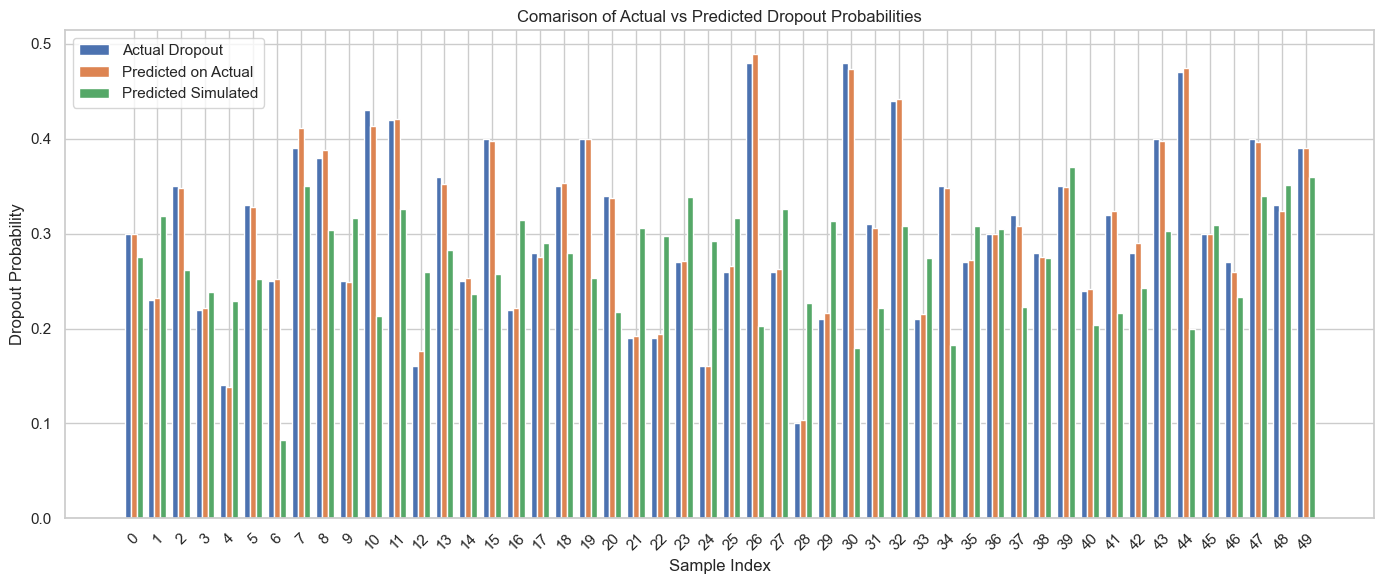

In [81]:
# Visualization

fig, ax = plt.subplots(figsize = (14, 6))
index = np.arange(len(actual_vs_simulated))

bar_width = 0.25

ax.bar(index-bar_width, actual_vs_simulated['Dropout_Actual'], bar_width, label = 'Actual Dropout')
ax.bar(index, actual_vs_simulated['Dropout_Predicted_Actual'], bar_width, label = 'Predicted on Actual')
ax.bar(index + bar_width, actual_vs_simulated['Dropout_Predicted_Simulated'], bar_width, label = 'Predicted Simulated')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Dropout Probability')
ax.set_title('Comarison of Actual vs Predicted Dropout Probabilities')
ax.set_xticks(index)
ax.set_xticklabels(index, rotation = 45)
ax.legend()
plt.tight_layout()
plt.show();

MAE: 0.004
RMSE: 0.000


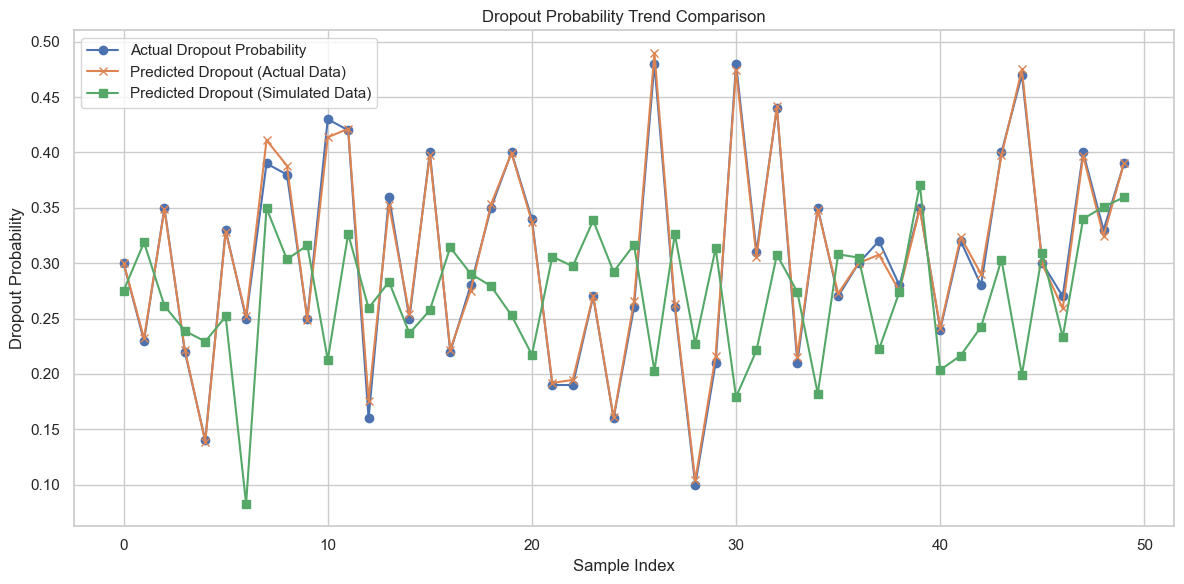

In [82]:
# Compute error metrics for actual data

mae_actual = metrics.mean_absolute_error(actual_sample['dropout_probability'], actual_sample['Predicted_Dropout_Probability'])
rmse_actual = metrics.mean_squared_error(actual_sample['dropout_probability'], actual_sample['Predicted_Dropout_Probability'])

print(f"MAE: {mae_actual:.3f}")
print(f"RMSE: {rmse_actual:.3f}")

plt.figure(figsize = (12, 6))
plt.plot(actual_sample['dropout_probability'].values, label = 'Actual Dropout Probability', marker = 'o')
plt.plot(actual_sample['Predicted_Dropout_Probability'].values, label = 'Predicted Dropout (Actual Data)', marker = 'x')
plt.plot(sim_high_engagement['Predicted_Dropout_Probability'].values, label = 'Predicted Dropout (Simulated Data)', marker = 's')
plt.title('Dropout Probability Trend Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Dropout Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

#### Conclusion

MAE: 0.004, RMSE: 0.000 between actual dropout and predicted dropout on the actual dataset. This indicates excellent predictive performance of the model on known data, which almost negligible error. 

By using multivariate normal sampling from the empirical covariance matrix of real data, the simulated samples preserve the real-world relationships between features. 

In the bar plot and trend plot:
- the green line (simulated predictions) follows the same directional trend and range as the actual/predicted orange and blue lines
  
- this suggests the trained model generalizes well and can make trustworthy predictions on out-of-sample but realistically structured data. 

In [83]:
# Save final model
try:
    with open('rf_reg_final.pkl', 'wb') as f:
        dill.dump(rf_reg_final, f)
    print('Final model saved.')
except Exception as e:
    print('Error saving final model:', e)

Final model saved.
